<a href="https://colab.research.google.com/github/shivank9199/Prediction-of-resistance-mutation-in-SARS-CoV-2-against-Sotrovimab-using-machine-learning/blob/main/UG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/scores-Sotrovimab.csv")

In [ ]:
data.describe()

Affinity    dAffinity    Stability   dStability
count  1180.000000  1180.000000  1180.000000  1180.000000
mean    -76.662923    -0.018581  -505.495453     1.165594
std       2.385250     0.755222   155.032246     1.088873
min     -88.093138    -6.609195 -1111.184654    -1.611617
25%     -77.346596    -0.004321  -519.438045     0.354527
50%     -77.223691     0.000000  -511.678405     0.977551
75%     -74.275886     0.000362  -387.477624     1.728895
max     -71.660856     5.729056  -372.063717     9.120628

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mutation    1180 non-null   object 
 1   Affinity    1180 non-null   float64
 2   dAffinity   1180 non-null   float64
 3   Stability   1180 non-null   float64
 4   dStability  1180 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.2+ KB


In [ ]:
data.head()

mutation   Affinity  dAffinity   Stability  dStability
0  4:I332I -77.450494   0.000000 -519.496314    0.000000
1  4:I332R -76.571197   0.879297 -518.859181    0.637133
2  4:I332N -77.456925  -0.006431 -517.547612    1.948702
3  4:I332L -77.449147   0.001347 -518.885106    0.611208
4  4:I332K -76.690015   0.760479 -517.399535    2.096779

In [ ]:
def separator_1(mutation):
  return int(mutation[0]) 

def separator_2(mutation):
  return mutation[2]

def separator_3(mutation):
  return int(mutation[3:6])

def separator_4(mutation):
  return mutation[-1]


data['first_integer'] = data['mutation'].apply(separator_1)
data['initial'] = data['mutation'].apply(separator_2)
data['position'] = data['mutation'].apply(separator_3)
data['mutated'] = data['mutation'].apply(separator_4)

In [ ]:
data2 = data.drop(['first_integer'], axis=1)
print(data2)
print(data)

     mutation   Affinity  dAffinity   Stability  dStability initial  position  \
0     4:I332I -77.450494   0.000000 -519.496314    0.000000       I       332   
1     4:I332R -76.571197   0.879297 -518.859181    0.637133       I       332   
2     4:I332N -77.456925  -0.006431 -517.547612    1.948702       I       332   
3     4:I332L -77.449147   0.001347 -518.885106    0.611208       I       332   
4     4:I332K -76.690015   0.760479 -517.399535    2.096779       I       332   
...       ...        ...        ...         ...         ...     ...       ...   
1175  6:G526C -77.249480  -0.021597 -517.027832    0.786801       G       526   
1176  6:G526E -77.317239  -0.089356 -516.588186    1.226446       G       526   
1177  6:G526S -77.240715  -0.012832 -517.037783    0.776849       G       526   
1178  6:G526W -77.239905  -0.012022 -519.220894   -1.406261       G       526   
1179  6:G526V -77.250891  -0.023008 -517.840365   -0.025733       G       526   

     mutated  
0          I

In [ ]:
data_encoded = pd.get_dummies(data, columns = ['initial', 'mutated'])

In [ ]:
data_encoded.head()

mutation   Affinity  dAffinity   Stability  dStability  first_integer  \
0  4:I332I -77.450494   0.000000 -519.496314    0.000000              4   
1  4:I332R -76.571197   0.879297 -518.859181    0.637133              4   
2  4:I332N -77.456925  -0.006431 -517.547612    1.948702              4   
3  4:I332L -77.449147   0.001347 -518.885106    0.611208              4   
4  4:I332K -76.690015   0.760479 -517.399535    2.096779              4   

   position  initial_A  initial_C  initial_D  ...  mutated_M  mutated_N  \
0       332          0          0          0  ...          0          0   
1       332          0          0          0  ...          0          0   
2       332          0          0          0  ...          0          1   
3       332          0          0          0  ...          0          0   
4       332          0          0          0  ...          0          0   

   mutated_P  mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  \
0          0          0          0          0          0          0   
1          0          0          1          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   mutated_W  mutated_Y  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 46 columns]

In [ ]:
data_encoded.describe()

Affinity    dAffinity    Stability   dStability  first_integer  \
count  1180.000000  1180.000000  1180.000000  1180.000000    1180.000000   
mean    -76.662923    -0.018581  -505.495453     1.165594       5.007627   
std       2.385250     0.755222   155.032246     1.088873       0.712741   
min     -88.093138    -6.609195 -1111.184654    -1.611617       4.000000   
25%     -77.346596    -0.004321  -519.438045     0.354527       4.750000   
50%     -77.223691     0.000000  -511.678405     0.977551       5.000000   
75%     -74.275886     0.000362  -387.477624     1.728895       6.000000   
max     -71.660856     5.729056  -372.063717     9.120628       6.000000   

          position    initial_A    initial_C    initial_D    initial_E  ...  \
count  1180.000000  1180.000000  1180.000000  1180.000000  1180.000000  ...   
mean    428.551695     0.054237     0.029661     0.040678     0.029661  ...   
std      60.069650     0.226581     0.169722     0.197627     0.169722  ...   
min     332.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     372.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%     433.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     490.000000     0.000000     0.000000     0.000000     0.000000  ...   
max     526.000000     1.000000     1.000000     1.000000     1.000000  ...   

         mutated_M    mutated_N    mutated_P    mutated_Q    mutated_R  \
count  1180.000000  1180.000000  1180.000000  1180.000000  1180.000000   
mean      0.042373     0.044915     0.044915     0.031356     0.048305   
std       0.201524     0.207206     0.207206     0.174352     0.214501   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         mutated_S    mutated_T    mutated_V    mutated_W    mutated_Y  
count  1180.000000  1180.000000  1180.000000  1180.000000  1180.000000  
mean      0.089831     0.050000     0.060169     0.036441     0.048305  
std       0.286060     0.218037     0.237901     0.187463     0.214501  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 45 columns]

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mutation       1180 non-null   object 
 1   Affinity       1180 non-null   float64
 2   dAffinity      1180 non-null   float64
 3   Stability      1180 non-null   float64
 4   dStability     1180 non-null   float64
 5   first_integer  1180 non-null   int64  
 6   position       1180 non-null   int64  
 7   initial_A      1180 non-null   uint8  
 8   initial_C      1180 non-null   uint8  
 9   initial_D      1180 non-null   uint8  
 10  initial_E      1180 non-null   uint8  
 11  initial_F      1180 non-null   uint8  
 12  initial_G      1180 non-null   uint8  
 13  initial_H      1180 non-null   uint8  
 14  initial_I      1180 non-null   uint8  
 15  initial_K      1180 non-null   uint8  
 16  initial_L      1180 non-null   uint8  
 17  initial_N      1180 non-null   uint8  
 18  initial_

In [ ]:
X_all = data_encoded.drop(['mutation', 'Affinity', 'first_integer'], axis = 1)
y = data_encoded['Affinity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.20, random_state=42)

In [ ]:
X_train_all

dAffinity   Stability  dStability  position  initial_A  initial_C  \
296  -2.190893e-02 -381.676037    1.444054       373          0          0   
599  -6.915056e-03 -520.911332    0.846907       434          0          0   
711  -2.519680e-02 -387.920498   -0.364963       448          0          0   
274  -1.734891e-01 -520.394200    2.355329       365          0          0   
362  -2.470730e-04 -514.369874    0.547569       390          0          0   
...            ...         ...         ...       ...        ...        ...   
1044 -1.928278e-02 -516.026899    0.212808       510          0          0   
1095  3.270000e-05 -390.415090    0.905258       516          0          0   
1130  0.000000e+00 -385.939812    0.000000       521          0          0   
860   4.740000e-08 -391.306222    1.728608       472          0          0   
1126  2.170000e-07 -387.030386    1.211812       520          1          0   

      initial_D  initial_E  initial_F  initial_G  ...  mutated_M  mutated_N  \
296           0          0          0          0  ...          0          0   
599           0          0          0          0  ...          0          0   
711           0          0          0          0  ...          0          0   
274           0          0          0          0  ...          0          0   
362           0          0          0          0  ...          0          0   
...         ...        ...        ...        ...  ...        ...        ...   
1044          0          0          0          0  ...          0          0   
1095          0          1          0          0  ...          0          0   
1130          0          0          0          0  ...          0          0   
860           0          0          0          0  ...          0          0   
1126          0          0          0          0  ...          0          0   

      mutated_P  mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  \
296           0          0          0          0          0          0   
599           0          0          0          0          0          0   
711           0          0          0          0          0          0   
274           0          0          0          0          0          0   
362           0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1044          0          0          0          0          0          0   
1095          0          0          0          0          0          0   
1130          1          0          0          0          0          0   
860           0          0          1          0          0          0   
1126          1          0          0          0          0          0   

      mutated_W  mutated_Y  
296           0          0  
599           0          0  
711           0          0  
274           0          0  
362           1          0  
...         ...        ...  
1044          0          0  
1095          0          0  
1130          0          0  
860           0          0  
1126          0          0  

[944 rows x 43 columns]

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression_all = LinearRegression()
linear_regression_all.fit(X_train_all, y_train_all)
linear_regression_all.score(X_test_all, y_test_all)

0.6206843389820673

In [ ]:
from sklearn.svm import SVR
regressor_all = SVR(kernel = "rbf")
regressor_all.fit(X_train_all, y_train_all)
regressor_all.score(X_test_all, y_test_all)

0.6805992652099491

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor_all = DecisionTreeRegressor()
decision_regressor_all.fit(X_train_all, y_train_all)
decision_regressor_all.score(X_test_all, y_test_all)

0.8975354471686129

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rgg_all = RandomForestRegressor(random_state = 0)
rgg_all.fit(X_train_all, y_train_all)
rgg_all.score(X_test_all, y_test_all)

0.9708031554392137

In [ ]:
predicted_all = rgg_all.predict(X_test_all)

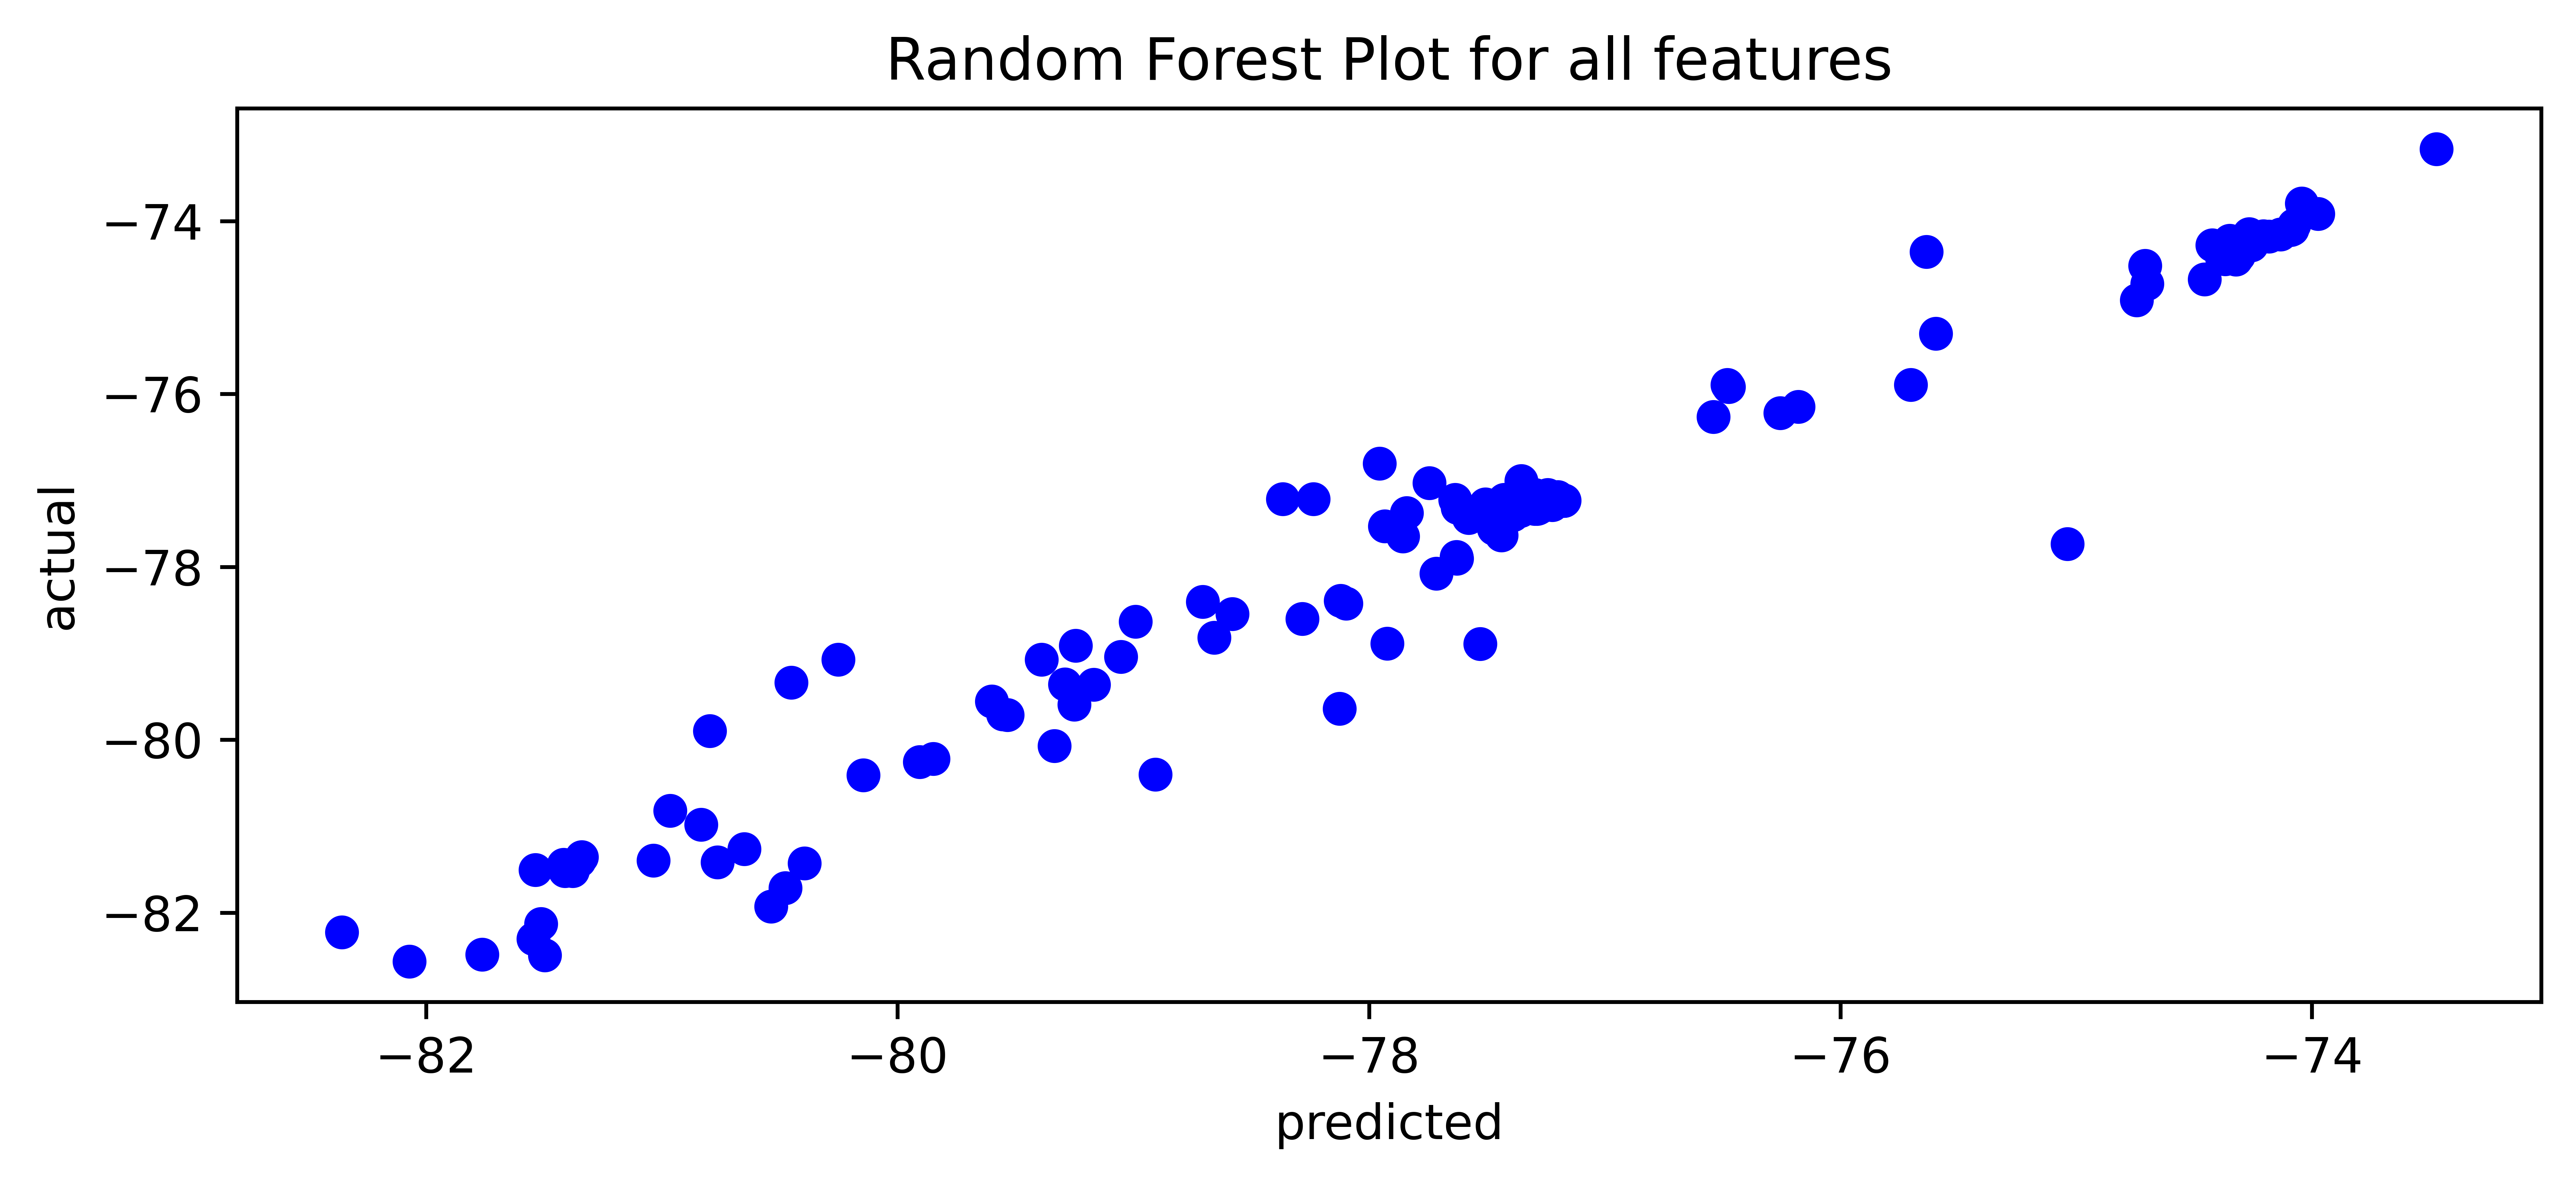

In [ ]:
plt.scatter(predicted_all, y_test_all, color = 'blue')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random Forest Plot for all features')
plt.rcParams['figure.dpi'] = 1000

The parameters of the line: [1.02802463 2.12516464]


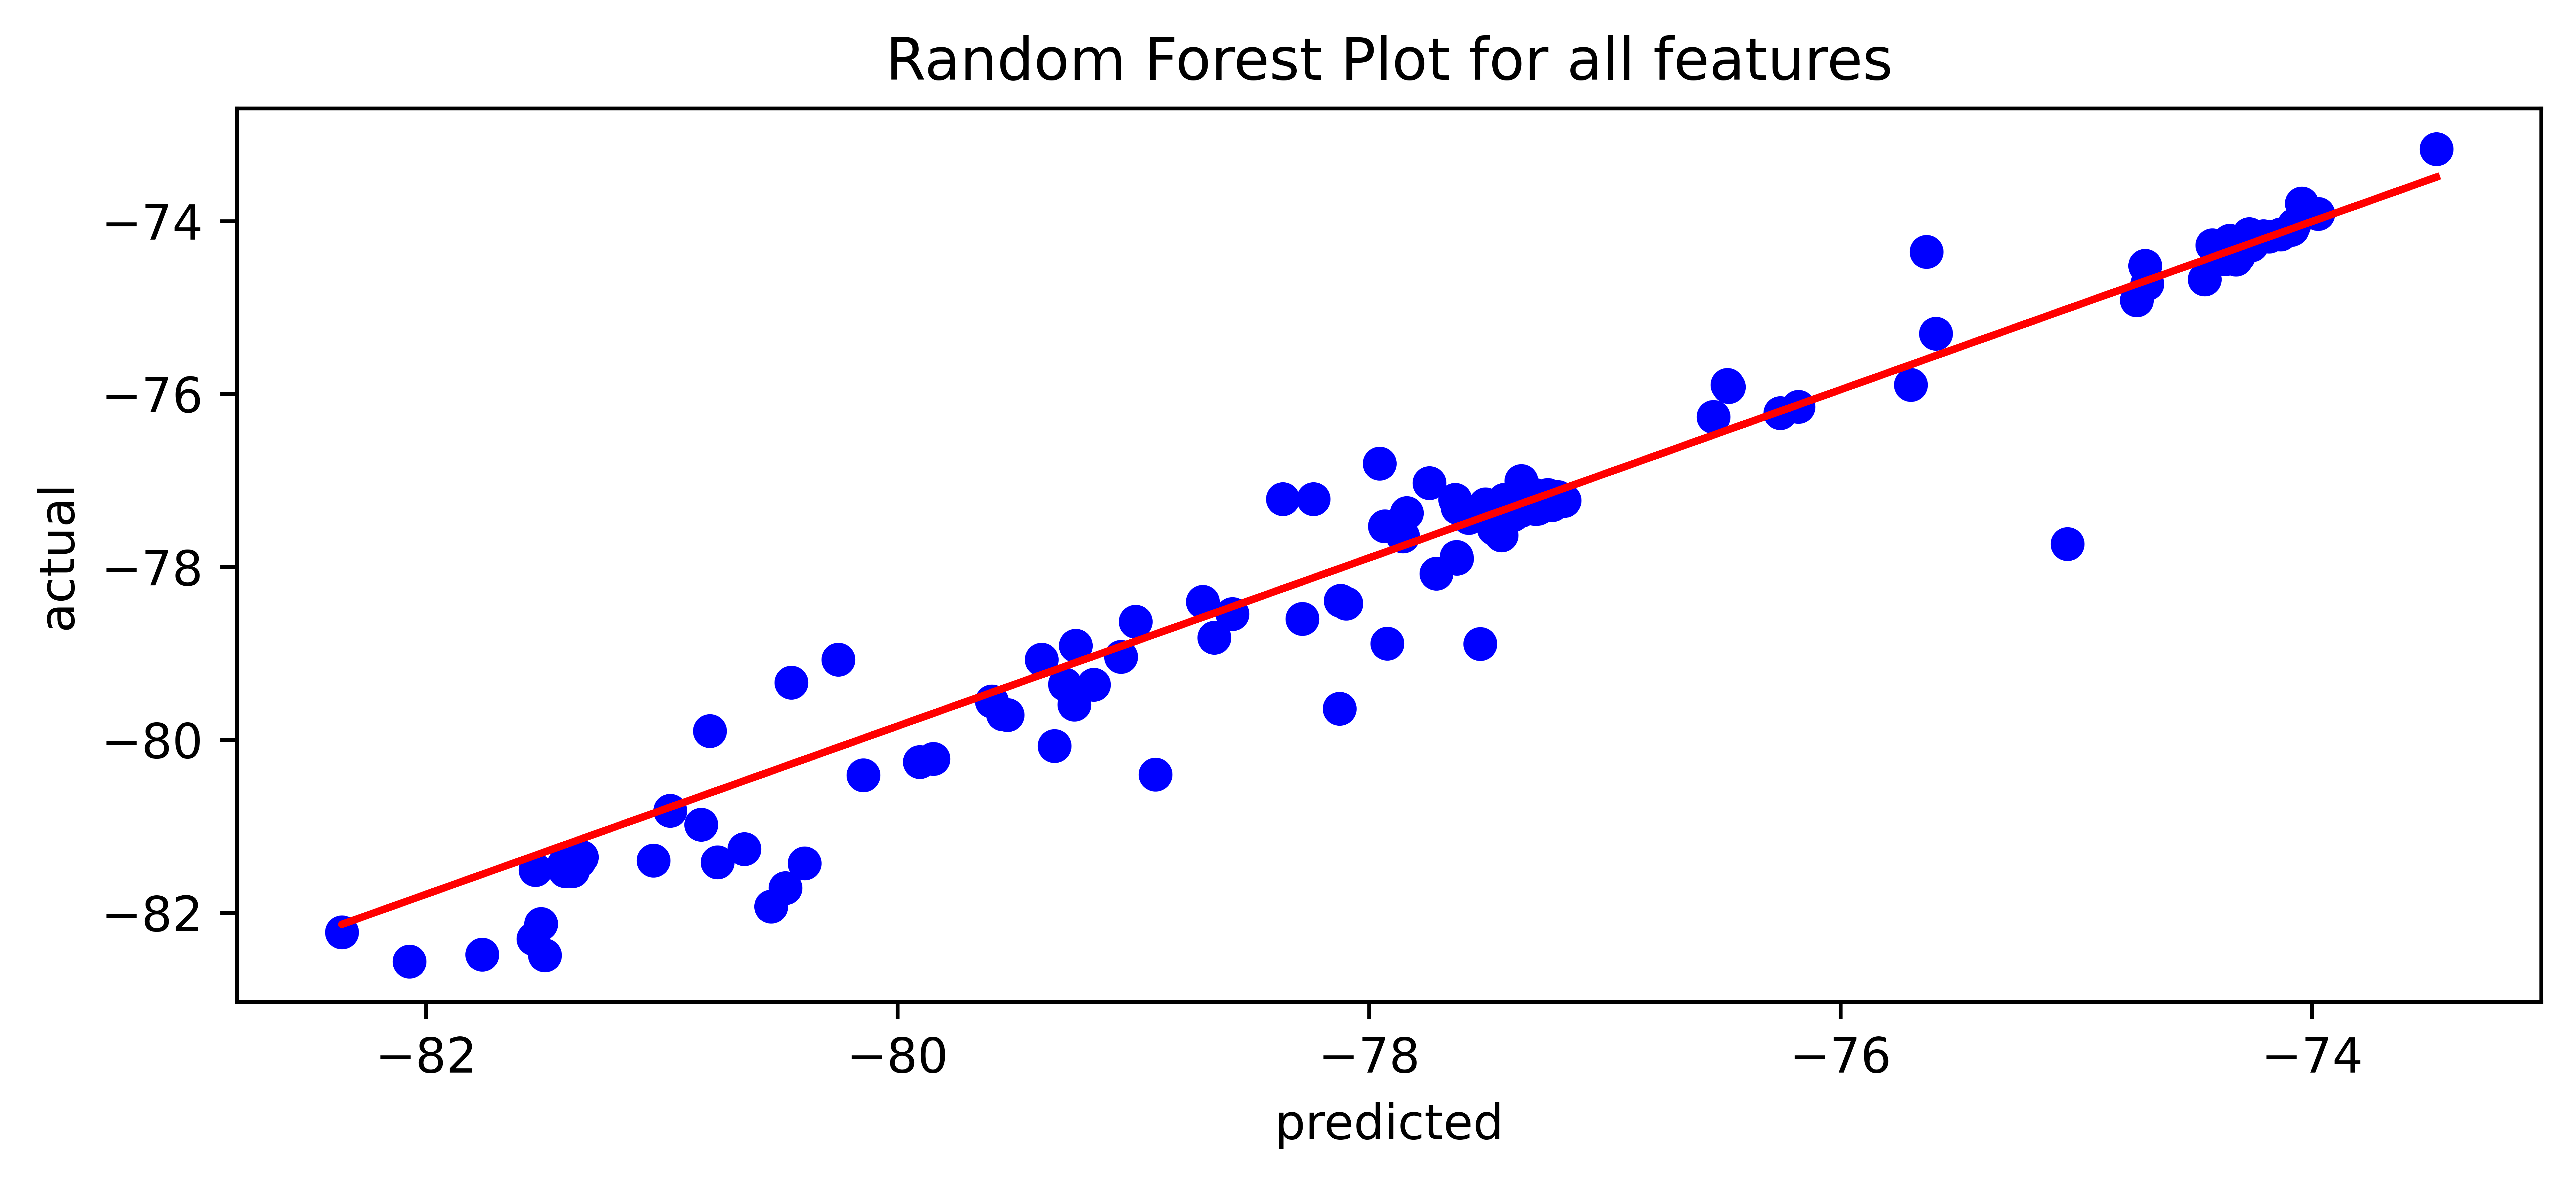

In [ ]:
theta1 = np.polyfit(predicted_all, y_test_all, 1)
print(f'The parameters of the line: {theta1}')
y_line_all = theta[1] + theta[0] * predicted_all
plt.scatter(predicted_all, y_test_all, color = 'blue')
plt.plot(predicted_all, y_line_all, 'r')
plt.title('Random Forest Plot for all features')
plt.xlabel('predicted')
plt.ylabel('actual')

plt.show()

**Position**

In [ ]:
X = data_encoded.drop(['mutation', 'Affinity', 'first_integer', 'dAffinity', 'Stability', 'dStability'], axis = 1)
y = data_encoded['Affinity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
X_train

position  initial_A  initial_C  initial_D  initial_E  initial_F  \
296        373          0          0          0          0          0   
599        434          0          0          0          0          0   
711        448          0          0          0          0          0   
274        365          0          0          0          0          0   
362        390          0          0          0          0          0   
...        ...        ...        ...        ...        ...        ...   
1044       510          0          0          0          0          0   
1095       516          0          0          0          1          0   
1130       521          0          0          0          0          0   
860        472          0          0          0          0          0   
1126       520          1          0          0          0          0   

      initial_G  initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  \
296           0          0          0          0  ...          0          0   
599           0          0          1          0  ...          0          0   
711           0          0          0          0  ...          0          0   
274           0          0          0          0  ...          0          0   
362           0          0          0          0  ...          0          0   
...         ...        ...        ...        ...  ...        ...        ...   
1044          0          0          0          0  ...          0          0   
1095          0          0          0          0  ...          0          0   
1130          0          0          0          0  ...          0          0   
860           0          0          1          0  ...          0          0   
1126          0          0          0          0  ...          0          0   

      mutated_P  mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  \
296           0          0          0          0          0          0   
599           0          0          0          0          0          0   
711           0          0          0          0          0          0   
274           0          0          0          0          0          0   
362           0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1044          0          0          0          0          0          0   
1095          0          0          0          0          0          0   
1130          1          0          0          0          0          0   
860           0          0          1          0          0          0   
1126          1          0          0          0          0          0   

      mutated_W  mutated_Y  
296           0          0  
599           0          0  
711           0          0  
274           0          0  
362           1          0  
...         ...        ...  
1044          0          0  
1095          0          0  
1130          0          0  
860           0          0  
1126          0          0  

[944 rows x 40 columns]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_regression.score(X_test, y_test)

0.3598392858637868

<ipython-input-7-ce98bde762fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(), cmap='coolwarm')


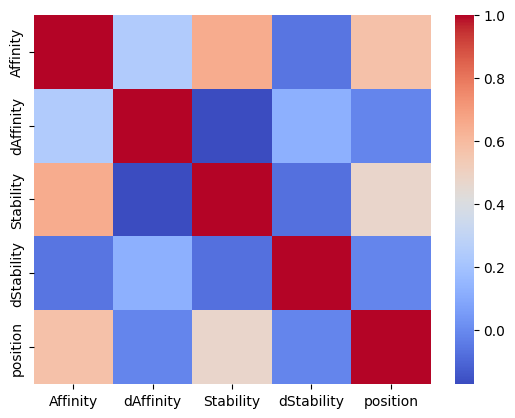

In [ ]:
plt.figure()
sns.heatmap(data2.corr(), cmap='coolwarm')
plt.show()

<ipython-input-31-87e509b07d5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_encoded.corr(), cmap='coolwarm')


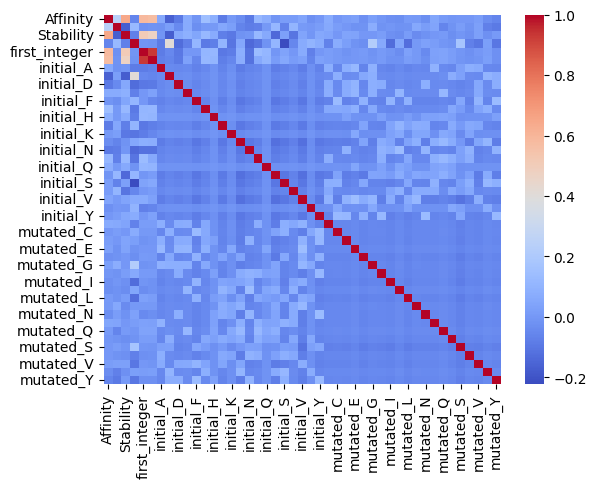

In [ ]:
plt.figure()
sns.heatmap(data_encoded.corr(), cmap='coolwarm')
plt.show()

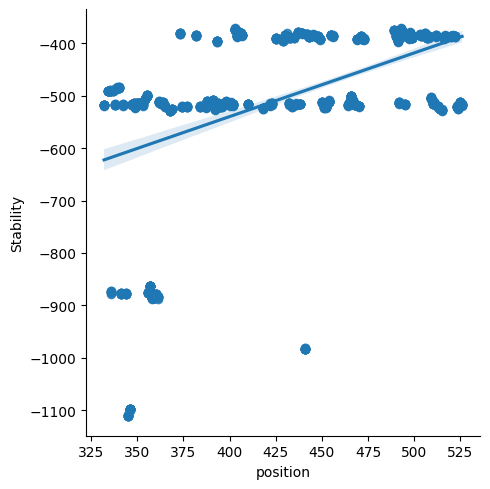

In [ ]:
sns.lmplot(x='position', y='Stability', data=data)

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel = "rbf")
regressor.fit(X_train, y_train)

SVR()

In [ ]:
regressor.score(X_test, y_test)

0.3522024914185581

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
decision_regressor.score(X_test, y_test)

0.8287529720732476

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rgg = RandomForestRegressor(random_state = 0)
rgg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
rgg.score(X_test, y_test)

0.942256029127714

In [ ]:
data_check = [[340, 'E', 'V'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check, columns=['position', 'initial', 'mutated'])
data_encoded_check = pd.get_dummies(df, columns = ['initial', 'mutated'])
check = data_encoded_check.loc[0]
data_encoded_check.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       340          0          0          0          1          0          0   
1       346          0          0          0          0          0          0   
2       346          1          0          0          0          0          0   
3       346          0          1          0          0          0          0   
4       346          0          0          1          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          1          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          1          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
rgg.predict(data_encoded_check)

array([-76.9233256 , -78.3284259 , -77.29269144, -79.02720186,
       -79.11763326, -79.1580798 , -79.03681521, -79.27519584,
       -78.85605977, -80.69130111, -79.49631418, -78.05144679,
       -79.19458457, -77.0175434 , -79.33985423, -80.36986315,
       -78.75216079, -79.8988471 , -79.14493984, -79.19220534,
       -79.18319313])

In [ ]:
data_check_337 = [[337, 'P', 'A'], [337, 'P', 'C'], [337, 'P', 'D'], [337, 'P', 'E'], [337, 'P', 'F'], [337, 'P', 'G'], [337, 'P', 'H'], [337, 'P', 'I'], [337, 'P', 'K'], [337, 'P', 'L'], [337, 'P', 'M'], [337, 'P', 'N'], [337, 'P', 'P'], [337, 'P', 'Q'], [337, 'P', 'R'], [337, 'P', 'S'], [337, 'P', 'T'], [337, 'P', 'V'], [337, 'P', 'W'], [337, 'P', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_337, columns=['position', 'initial', 'mutated'])
data_encoded_check_337 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_337 = data_encoded_check_337.loc[0]
data_encoded_check_337.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       337          0          0          0          0          0          0   
1       337          0          0          0          0          0          0   
2       337          0          0          0          0          0          0   
3       337          0          0          0          0          0          0   
4       337          0          0          0          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_337 = rgg.predict(data_encoded_check_337)
predicted_337

array([-78.32000849, -79.66703142, -79.66032161, -79.72275555,
       -79.5654657 , -79.35812409, -79.21160117, -79.85527017,
       -80.36098116, -78.77129532, -79.95686665, -80.40850672,
       -78.5370385 , -82.45034303, -79.92192079, -80.90800838,
       -80.07162482, -79.38562344, -79.66825643, -81.1113    ,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_337_final = predicted_337[0:20]
predicted_337_final

array([-78.32000849, -79.66703142, -79.66032161, -79.72275555,
       -79.5654657 , -79.35812409, -79.21160117, -79.85527017,
       -80.36098116, -78.77129532, -79.95686665, -80.40850672,
       -78.5370385 , -82.45034303, -79.92192079, -80.90800838,
       -80.07162482, -79.38562344, -79.66825643, -81.1113    ])

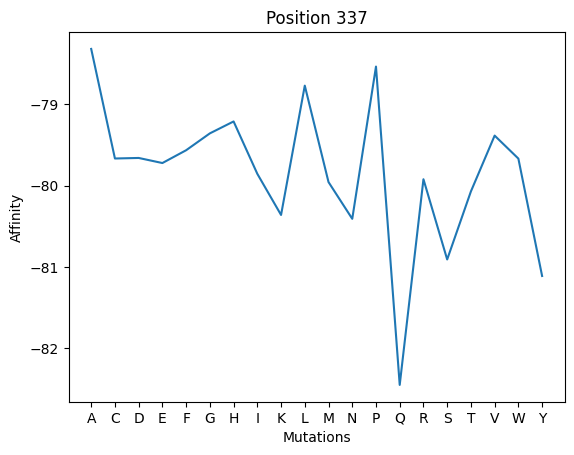

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 337")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_337_final)

In [ ]:
data_check_340 = [[340, 'E', 'A'], [340, 'E', 'C'], [340, 'E', 'D'], [340, 'E', 'E'], [340, 'E', 'F'], [340, 'E', 'G'], [340, 'E', 'H'], [340, 'E', 'I'], [340, 'E', 'K'], [340, 'E', 'L'], [340, 'E', 'M'], [340, 'E', 'N'], [340, 'E', 'P'], [340, 'E', 'Q'], [340, 'E', 'R'], [340, 'E', 'S'], [340, 'E', 'T'], [340, 'E', 'V'], [340, 'E', 'W'], [340, 'E', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_340, columns=['position', 'initial', 'mutated'])
data_encoded_check_340 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_340 = data_encoded_check_340.loc[0]
data_encoded_check_340.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       340          0          0          0          1          0          0   
1       340          0          0          0          1          0          0   
2       340          0          0          0          1          0          0   
3       340          0          0          0          1          0          0   
4       340          0          0          0          1          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_340 = rgg.predict(data_encoded_check_340)
predicted_340

array([-76.73843033, -79.07324868, -79.79394679, -79.24020598,
       -78.84628406, -78.76872308, -79.00933421, -79.18403376,
       -80.81462476, -78.9500273 , -79.57358961, -79.76620411,
       -78.33559955, -82.64786667, -79.04090411, -79.07500112,
       -79.08126902, -76.9233256 , -79.13355099, -80.39084373,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_340_final = predicted_340[0:20]
predicted_340_final

array([-76.73843033, -79.07324868, -79.79394679, -79.24020598,
       -78.84628406, -78.76872308, -79.00933421, -79.18403376,
       -80.81462476, -78.9500273 , -79.57358961, -79.76620411,
       -78.33559955, -82.64786667, -79.04090411, -79.07500112,
       -79.08126902, -76.9233256 , -79.13355099, -80.39084373])

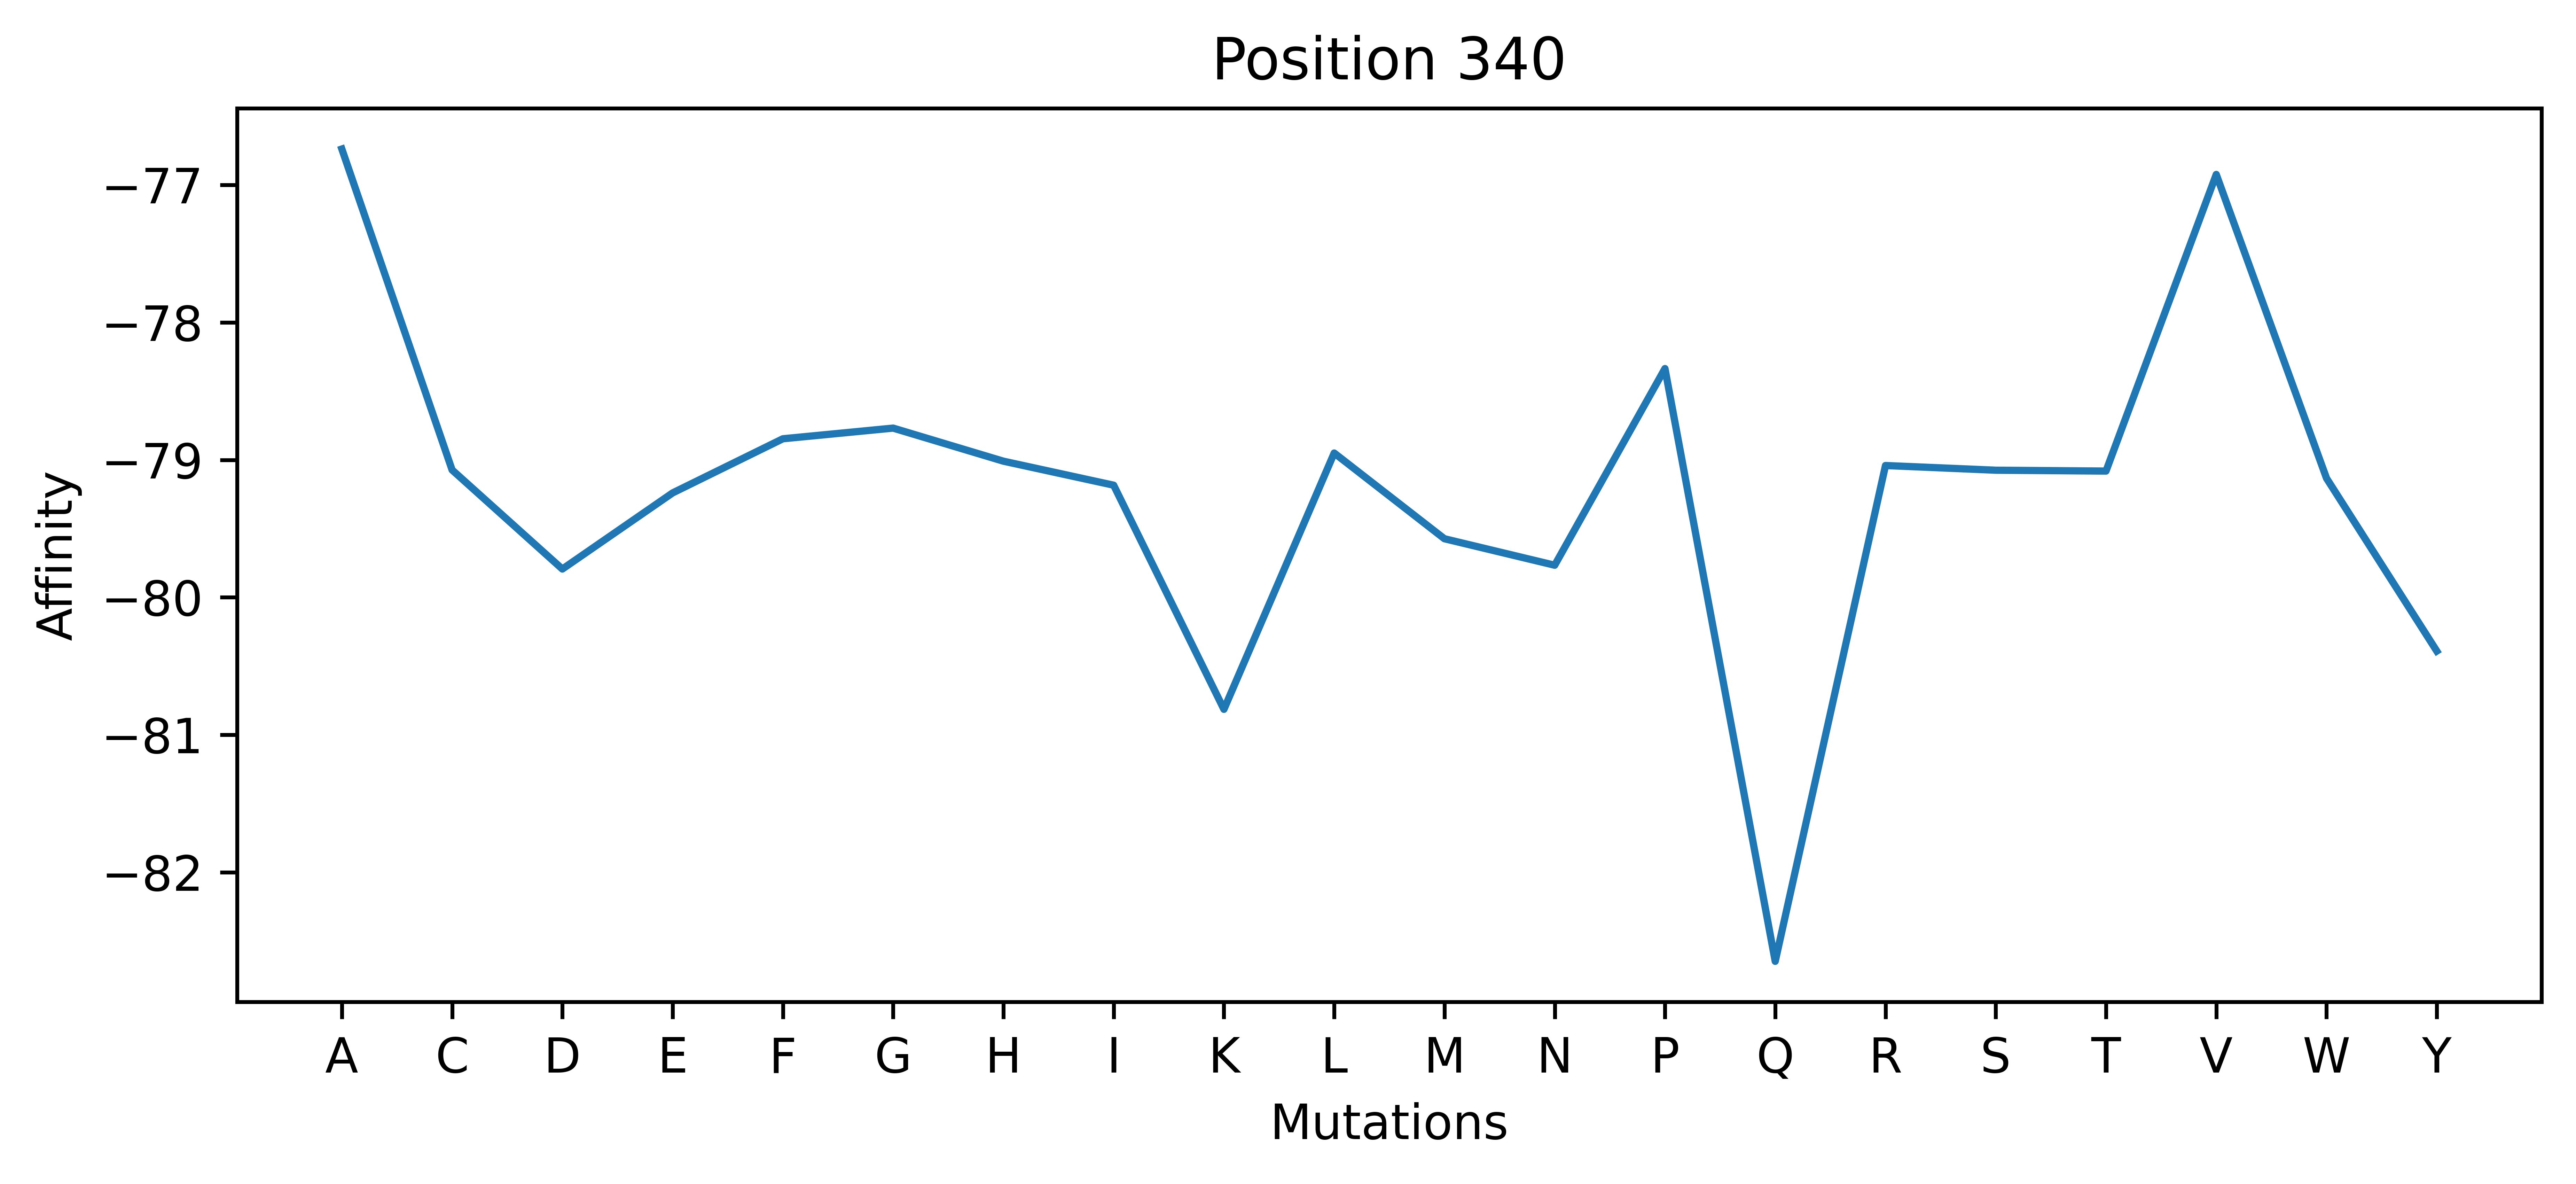

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 340")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_340_final)

In [ ]:
data_check_508 = [[508, 'Y', 'A'], [508, 'Y', 'C'], [508, 'Y', 'D'], [508, 'Y', 'E'], [508, 'Y', 'F'], [508, 'Y', 'G'], [508, 'Y', 'H'], [508, 'Y', 'I'], [508, 'Y', 'K'], [508, 'Y', 'L'], [508, 'Y', 'M'], [508, 'Y', 'N'], [508, 'Y', 'P'], [508, 'Y', 'Q'], [508, 'Y', 'R'], [508, 'Y', 'S'], [508, 'Y', 'T'], [508, 'Y', 'V'], [508, 'Y', 'W'], [508, 'Y', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_508, columns=['position', 'initial', 'mutated'])
data_encoded_check_508 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_508 = data_encoded_check_508.loc[0]
data_encoded_check_508.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       508          0          0          0          0          0          0   
1       508          0          0          0          0          0          0   
2       508          0          0          0          0          0          0   
3       508          0          0          0          0          0          0   
4       508          0          0          0          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_508 = rgg.predict(data_encoded_check_508)
predicted_508

array([-74.36367458, -74.47597109, -74.39979794, -74.36522066,
       -74.36609126, -74.36522066, -74.68556312, -74.36522066,
       -74.36522066, -74.36635561, -74.36522066, -74.39583264,
       -74.36522066, -74.36489847, -74.36522066, -74.43125247,
       -74.36522066, -74.35271202, -74.36522066, -74.33548418,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_508_final = predicted_508[0:20]
predicted_508_final

array([-74.36367458, -74.47597109, -74.39979794, -74.36522066,
       -74.36609126, -74.36522066, -74.68556312, -74.36522066,
       -74.36522066, -74.36635561, -74.36522066, -74.39583264,
       -74.36522066, -74.36489847, -74.36522066, -74.43125247,
       -74.36522066, -74.35271202, -74.36522066, -74.33548418])

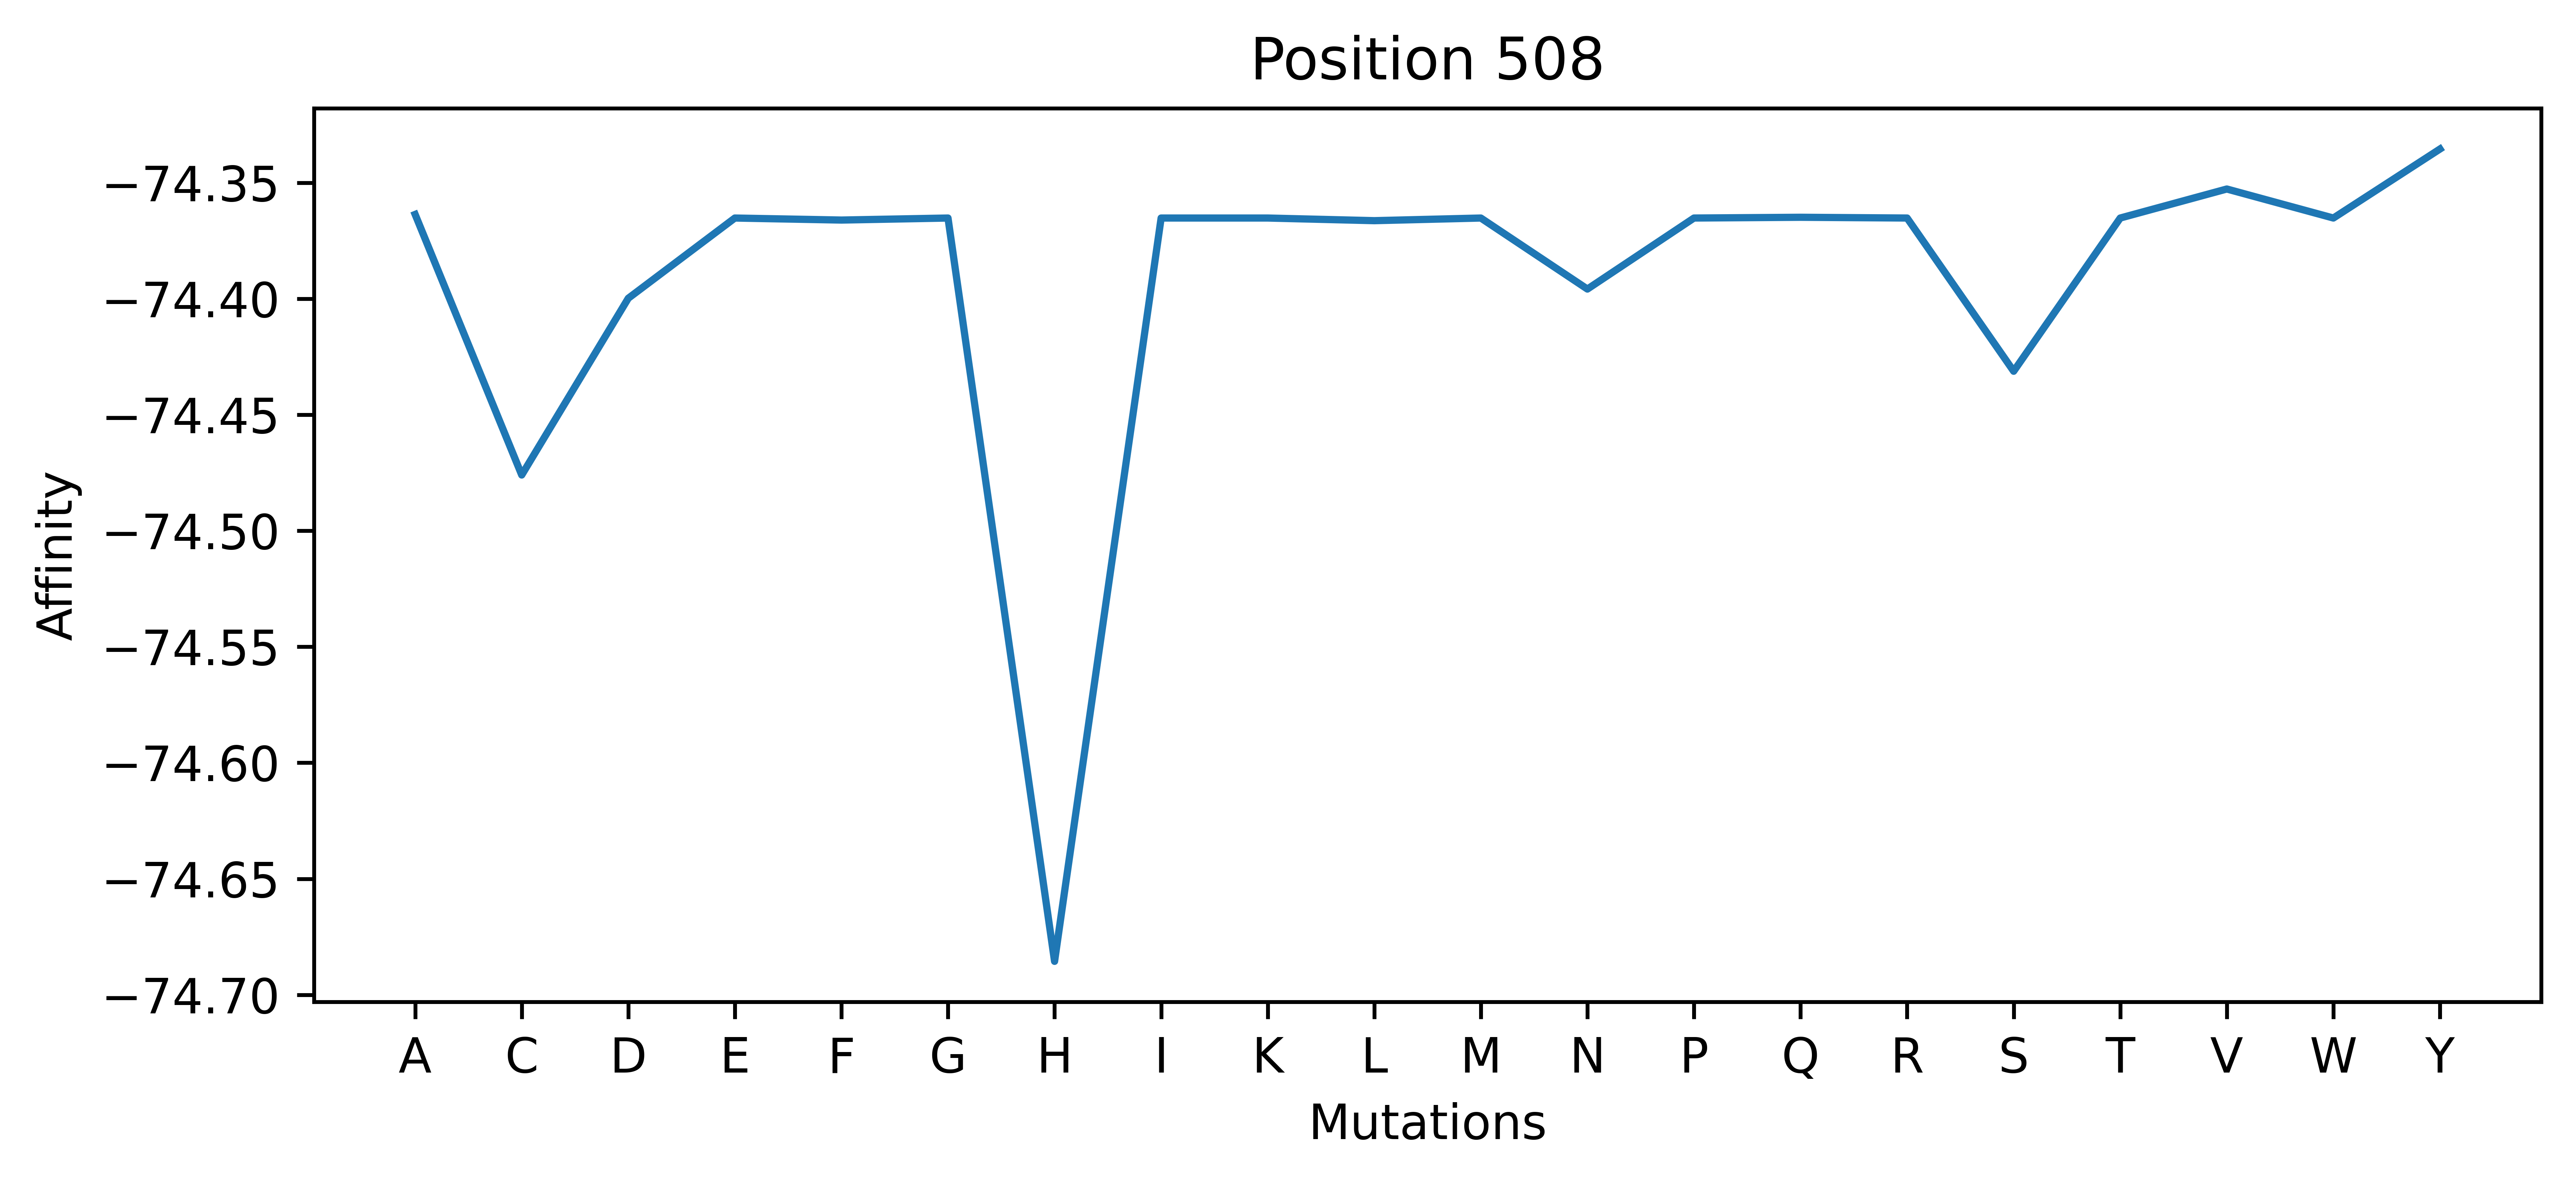

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 508")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_508_final)

In [ ]:
data_check_262 = [[262, 'A', 'A'], [262, 'A', 'C'], [262, 'A', 'D'], [262, 'A', 'E'], [262, 'A', 'F'], [262, 'A', 'G'], [262, 'A', 'H'], [262, 'A', 'I'], [262, 'A', 'K'], [262, 'A', 'L'], [262, 'A', 'M'], [262, 'A', 'N'], [262, 'A', 'P'], [262, 'A', 'Q'], [262, 'A', 'R'], [262, 'A', 'S'], [262, 'A', 'T'], [262, 'A', 'V'], [262, 'A', 'W'], [262, 'A', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_262, columns=['position', 'initial', 'mutated'])
data_encoded_check_262 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_262 = data_encoded_check_262.loc[0]
data_encoded_check_262.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       262          1          0          0          0          0          0   
1       262          1          0          0          0          0          0   
2       262          1          0          0          0          0          0   
3       262          1          0          0          0          0          0   
4       262          1          0          0          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_262 = rgg.predict(data_encoded_check_262)
predicted_262

array([-79.25656495, -79.58406226, -79.27267524, -79.96307006,
       -79.41681409, -79.36485424, -79.7331594 , -79.56620007,
       -79.75433755, -79.46381597, -79.66936162, -79.70123188,
       -79.50465884, -80.09538708, -79.60142483, -79.43204156,
       -79.36912154, -79.41015934, -79.72203423, -79.92960909,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_262_final = predicted_262[0:20]
predicted_262_final

array([-79.25656495, -79.58406226, -79.27267524, -79.96307006,
       -79.41681409, -79.36485424, -79.7331594 , -79.56620007,
       -79.75433755, -79.46381597, -79.66936162, -79.70123188,
       -79.50465884, -80.09538708, -79.60142483, -79.43204156,
       -79.36912154, -79.41015934, -79.72203423, -79.92960909])

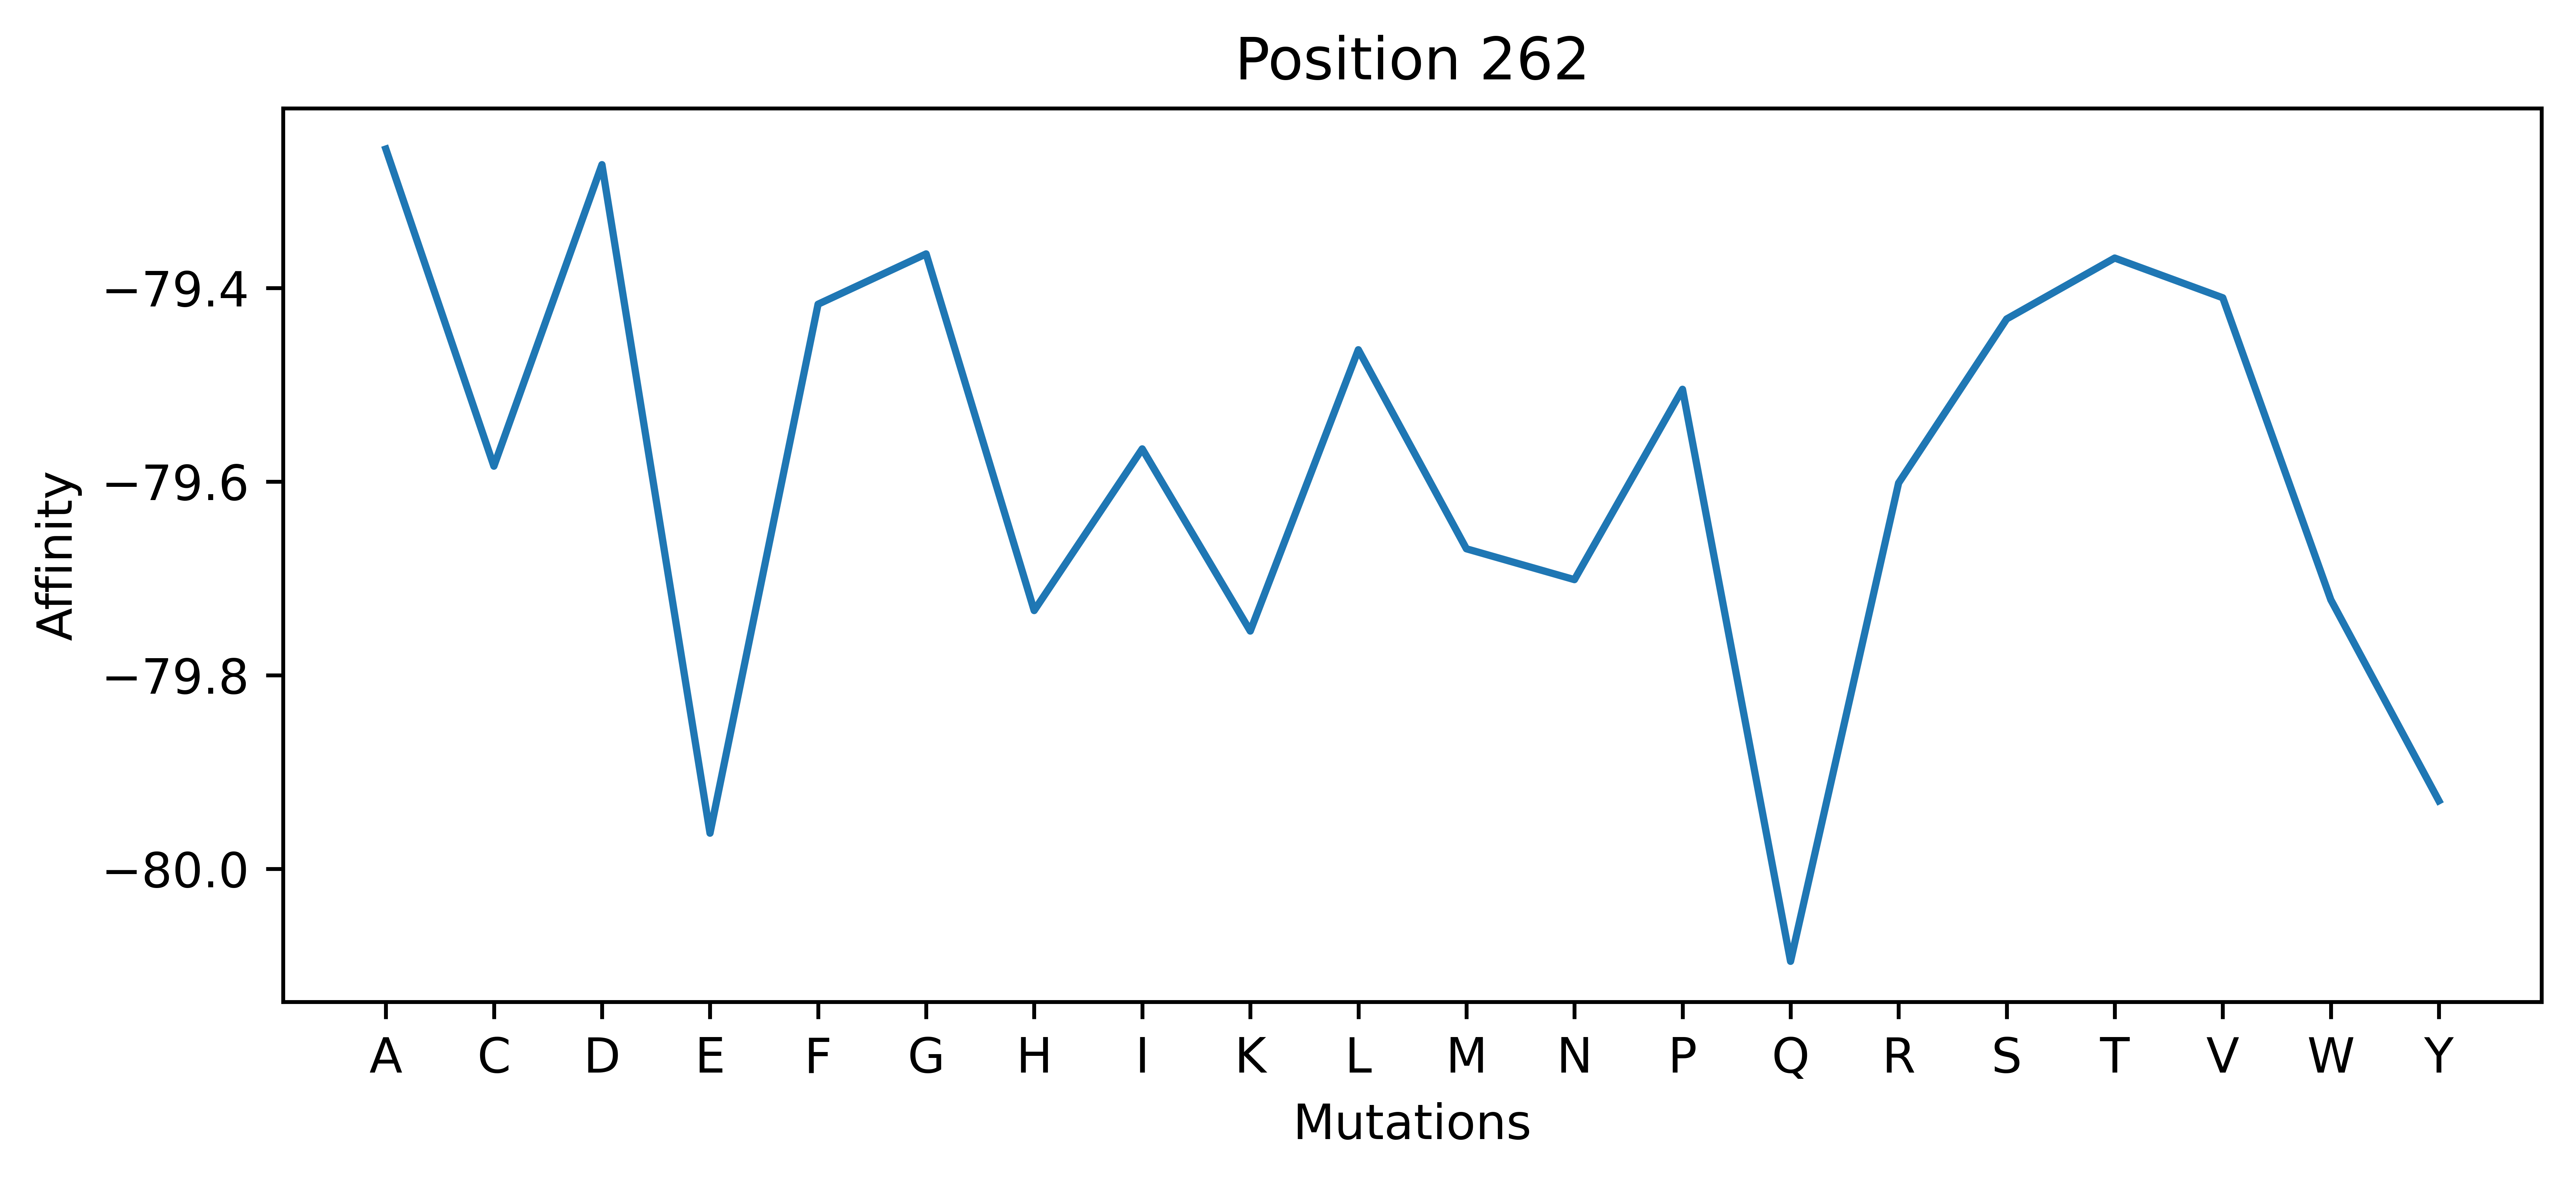

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 262")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_262_final)

In [ ]:
data_check_796 = [[796, 'D', 'A'], [796, 'D', 'C'], [796, 'D', 'D'], [796, 'D', 'E'], [796, 'D', 'F'], [796, 'D', 'G'], [796, 'D', 'H'], [796, 'D', 'I'], [796, 'D', 'K'], [796, 'D', 'L'], [796, 'D', 'M'], [796, 'D', 'N'], [796, 'D', 'P'], [796, 'D', 'Q'], [796, 'D', 'R'], [796, 'D', 'S'], [796, 'D', 'T'], [796, 'D', 'V'], [796, 'D', 'W'], [796, 'D', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_796, columns=['position', 'initial', 'mutated'])
data_encoded_check_796 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_796 = data_encoded_check_796.loc[0]
data_encoded_check_796.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       796          0          0          1          0          0          0   
1       796          0          0          1          0          0          0   
2       796          0          0          1          0          0          0   
3       796          0          0          1          0          0          0   
4       796          0          0          1          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_796 = rgg.predict(data_encoded_check_796)
predicted_796

array([-77.26729421, -77.25528839, -77.27182059, -77.29519682,
       -77.27838839, -77.26549306, -77.258052  , -77.26890723,
       -77.258052  , -77.26442785, -77.26513268, -77.258052  ,
       -77.258052  , -77.258052  , -77.25752136, -77.25928387,
       -77.258052  , -77.25903206, -77.25311699, -77.25899421,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_796_final = predicted_796[0:20]
predicted_796_final

array([-77.26729421, -77.25528839, -77.27182059, -77.29519682,
       -77.27838839, -77.26549306, -77.258052  , -77.26890723,
       -77.258052  , -77.26442785, -77.26513268, -77.258052  ,
       -77.258052  , -77.258052  , -77.25752136, -77.25928387,
       -77.258052  , -77.25903206, -77.25311699, -77.25899421])

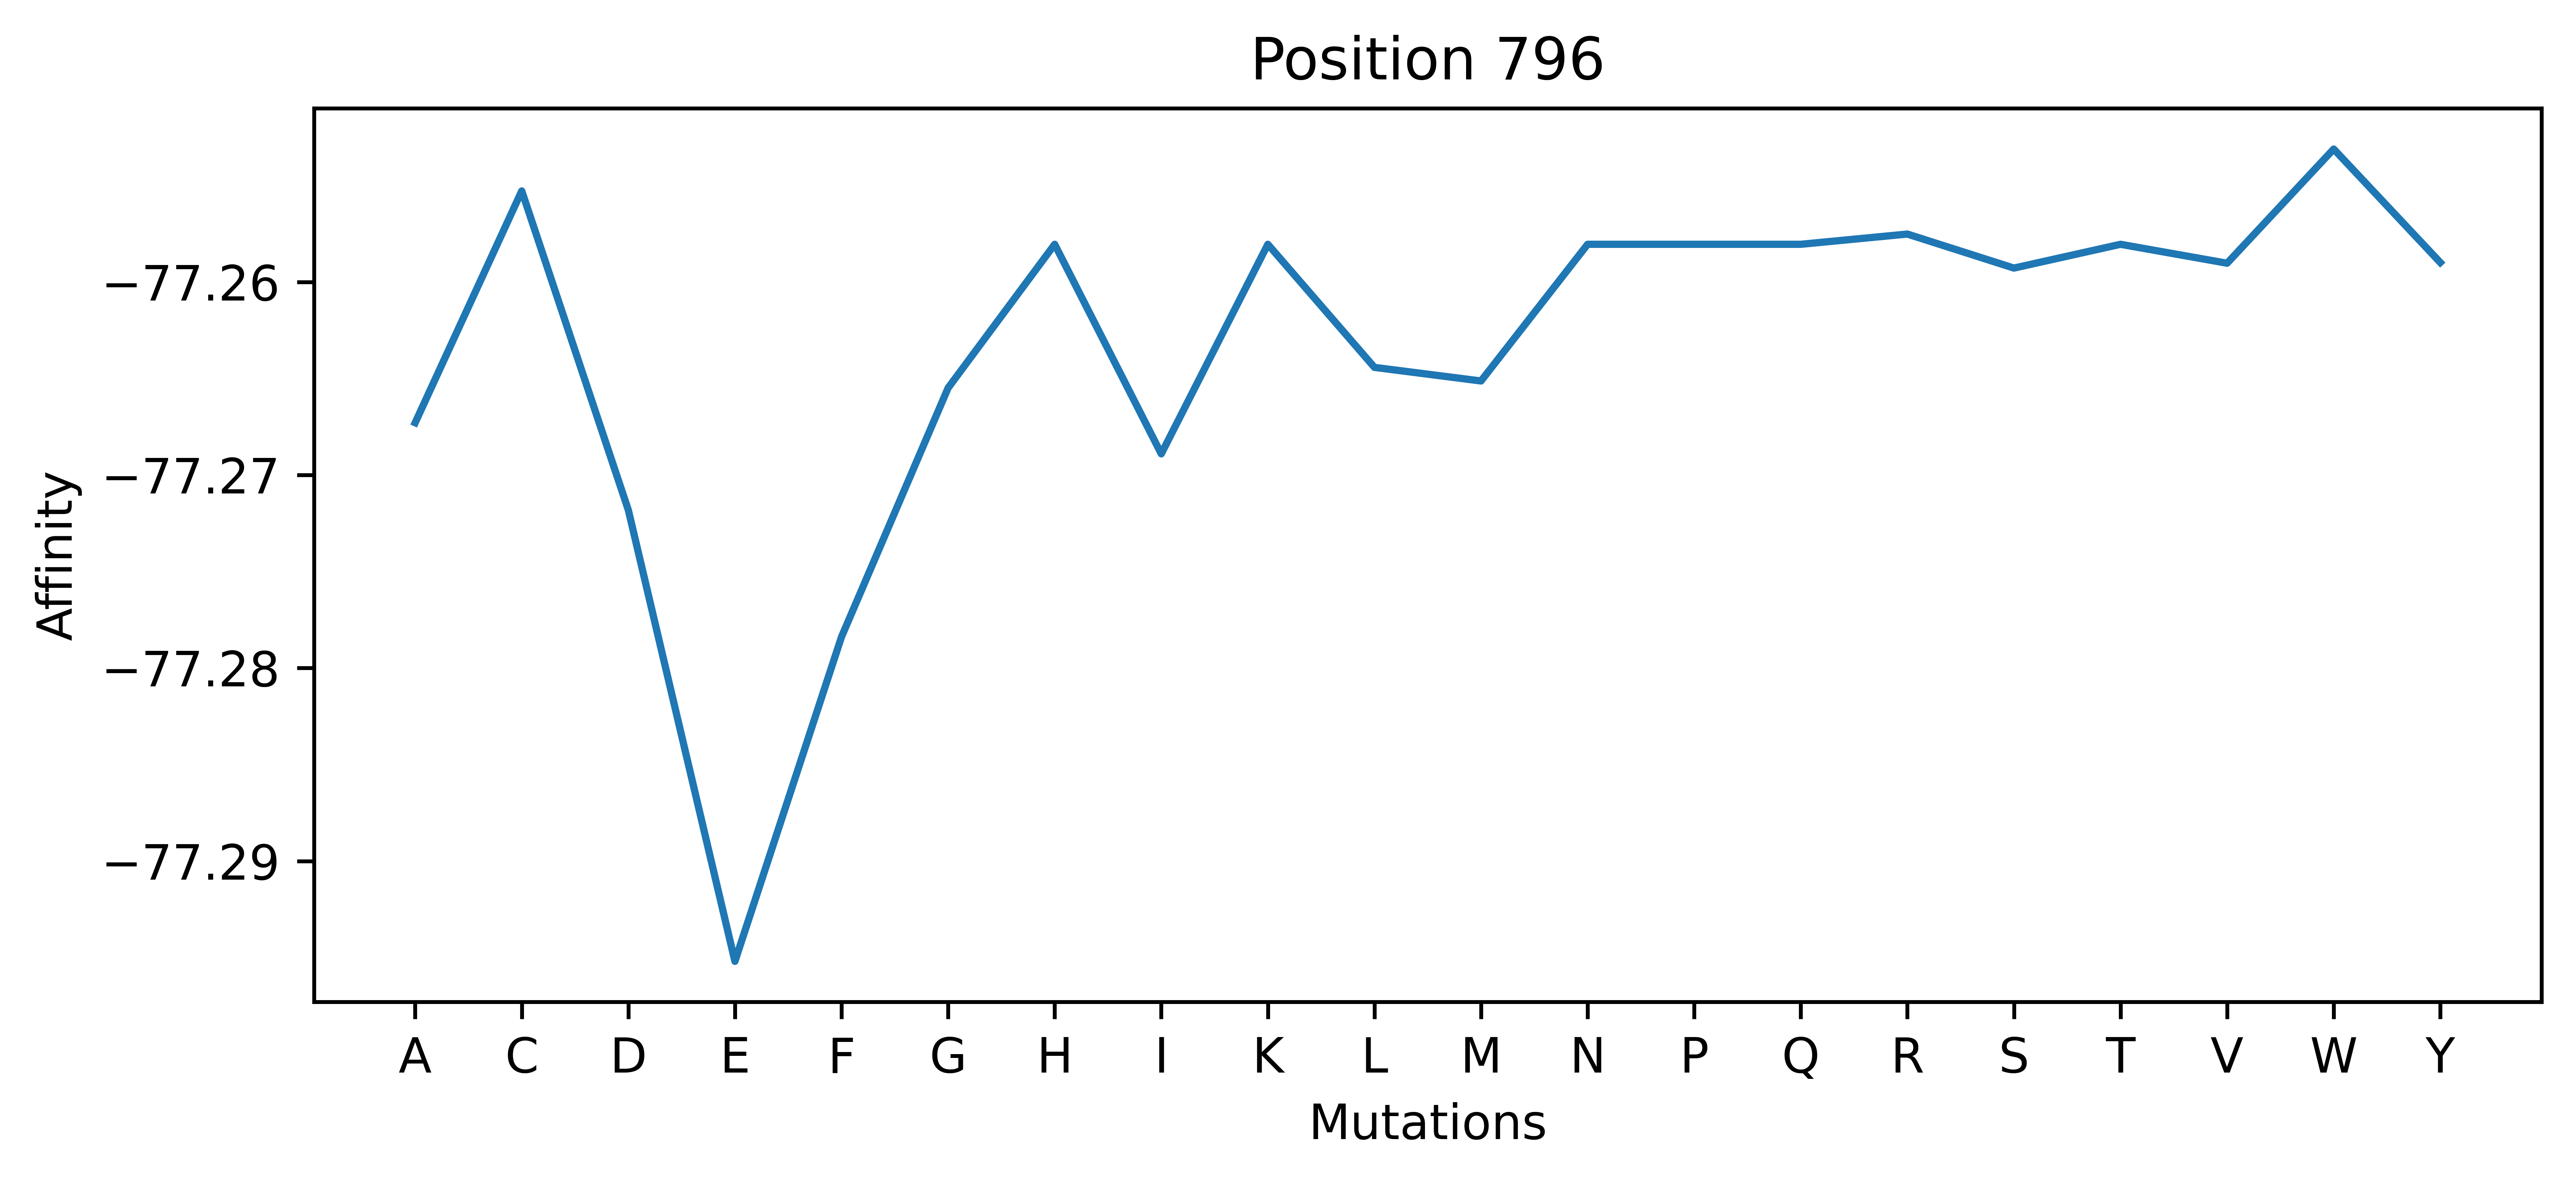

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 796")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_796_final)

In [ ]:
data_check_372 = [[372, 'A', 'A'], [372, 'A', 'C'], [372, 'A', 'D'], [372, 'A', 'E'], [372, 'A', 'F'], [372, 'A', 'G'], [372, 'A', 'H'], [372, 'A', 'I'], [372, 'A', 'K'], [372, 'A', 'L'], [372, 'A', 'M'], [372, 'A', 'N'], [372, 'A', 'P'], [372, 'A', 'Q'], [372, 'A', 'R'], [372, 'A', 'S'], [372, 'A', 'T'], [372, 'A', 'V'], [372, 'A', 'W'], [372, 'A', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_372, columns=['position', 'initial', 'mutated'])
data_encoded_check_372 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_372 = data_encoded_check_372.loc[0]
data_encoded_check_372.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       372          1          0          0          0          0          0   
1       372          1          0          0          0          0          0   
2       372          1          0          0          0          0          0   
3       372          1          0          0          0          0          0   
4       372          1          0          0          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_372 = rgg.predict(data_encoded_check_372)
predicted_372

array([-74.01647803, -74.01346432, -74.01346432, -74.01346432,
       -74.01056679, -74.01346432, -74.00097302, -74.03798702,
       -74.01346432, -74.08196082, -74.01346432, -74.01412442,
       -74.01068629, -74.01488676, -73.91760627, -74.02591319,
       -74.06440392, -73.979216  , -74.01346432, -74.01346432,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_372_final = predicted_372[0:20]
predicted_372_final

array([-74.01647803, -74.01346432, -74.01346432, -74.01346432,
       -74.01056679, -74.01346432, -74.00097302, -74.03798702,
       -74.01346432, -74.08196082, -74.01346432, -74.01412442,
       -74.01068629, -74.01488676, -73.91760627, -74.02591319,
       -74.06440392, -73.979216  , -74.01346432, -74.01346432])

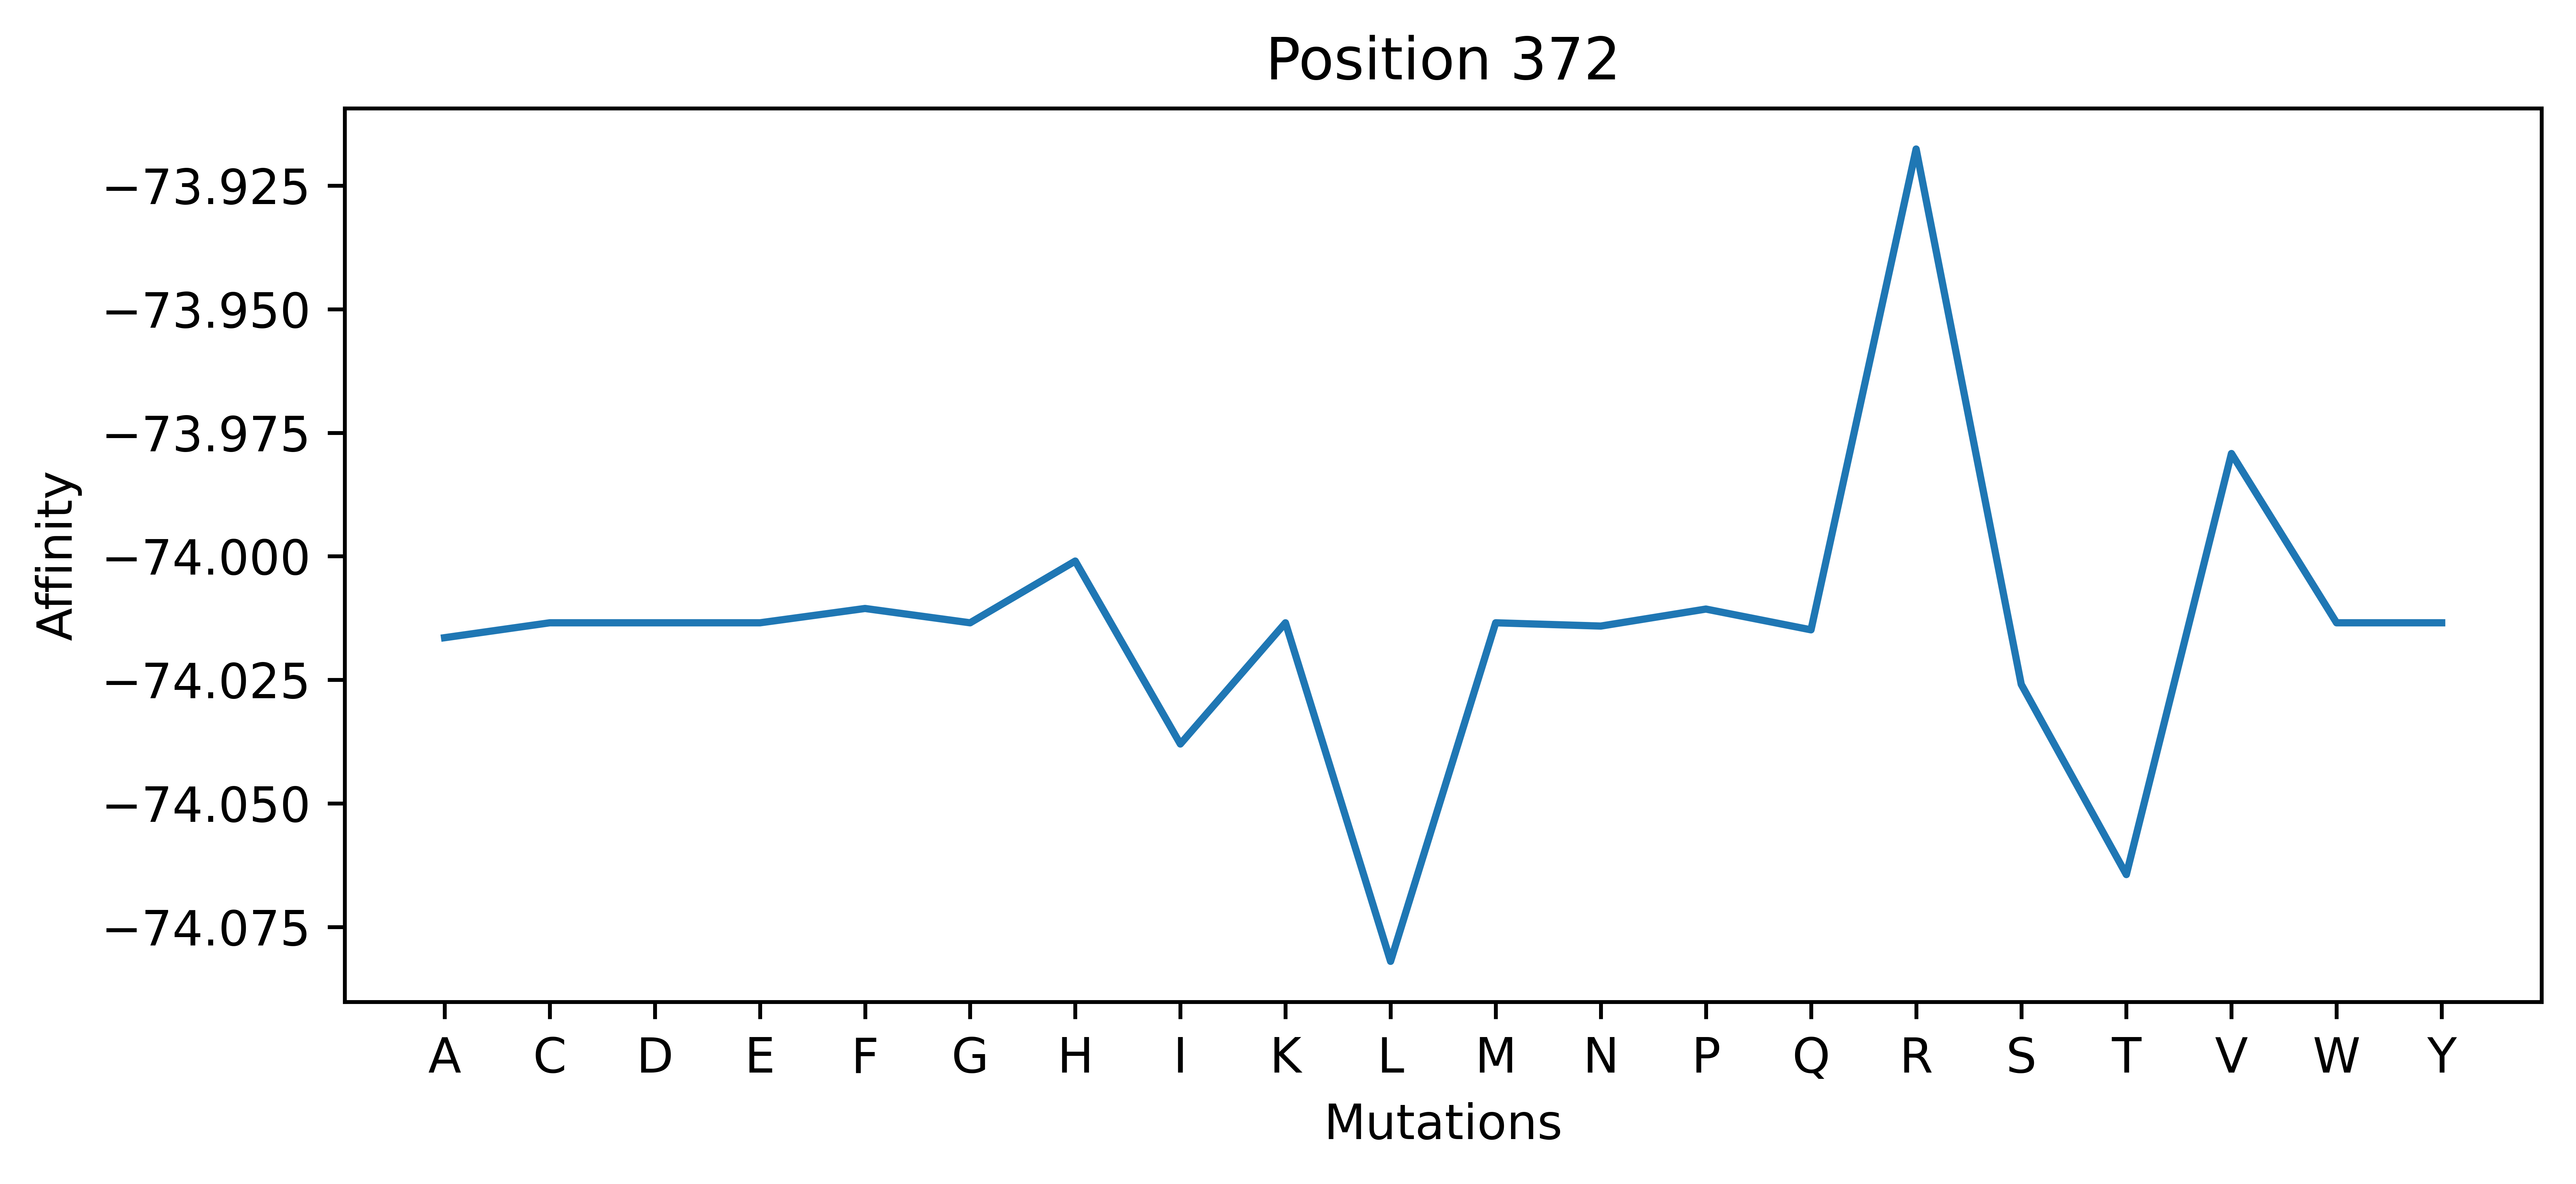

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 372")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_372_final)

In [ ]:
data_check_938 = [[938, 'H', 'A'], [938, 'H', 'C'], [938, 'H', 'D'], [938, 'H', 'E'], [938, 'H', 'F'], [938, 'H', 'G'], [938, 'H', 'H'], [938, 'H', 'I'], [938, 'H', 'K'], [938, 'H', 'L'], [938, 'H', 'M'], [938, 'H', 'N'], [938, 'H', 'P'], [938, 'H', 'Q'], [938, 'H', 'R'], [938, 'H', 'S'], [938, 'H', 'T'], [938, 'H', 'V'], [938, 'H', 'W'], [938, 'H', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_938, columns=['position', 'initial', 'mutated'])
data_encoded_check_938 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_938 = data_encoded_check_938.loc[0]
data_encoded_check_938.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       938          0          0          0          0          0          0   
1       938          0          0          0          0          0          0   
2       938          0          0          0          0          0          0   
3       938          0          0          0          0          0          0   
4       938          0          0          0          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          1          0          0  ...          0          0          0   
1          1          0          0  ...          0          0          0   
2          1          0          0  ...          0          0          0   
3          1          0          0  ...          0          0          0   
4          1          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_938 = rgg.predict(data_encoded_check_938)
predicted_938

array([-77.26729421, -77.25528839, -77.27182059, -77.29519682,
       -77.27838839, -77.26549306, -77.258052  , -77.26890723,
       -77.258052  , -77.26442785, -77.26513268, -77.258052  ,
       -77.258052  , -77.258052  , -77.25752136, -77.25928387,
       -77.258052  , -77.25903206, -77.25311699, -77.25899421,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_938_final = predicted_938[0:20]
predicted_938_final

array([-77.26729421, -77.25528839, -77.27182059, -77.29519682,
       -77.27838839, -77.26549306, -77.258052  , -77.26890723,
       -77.258052  , -77.26442785, -77.26513268, -77.258052  ,
       -77.258052  , -77.258052  , -77.25752136, -77.25928387,
       -77.258052  , -77.25903206, -77.25311699, -77.25899421])

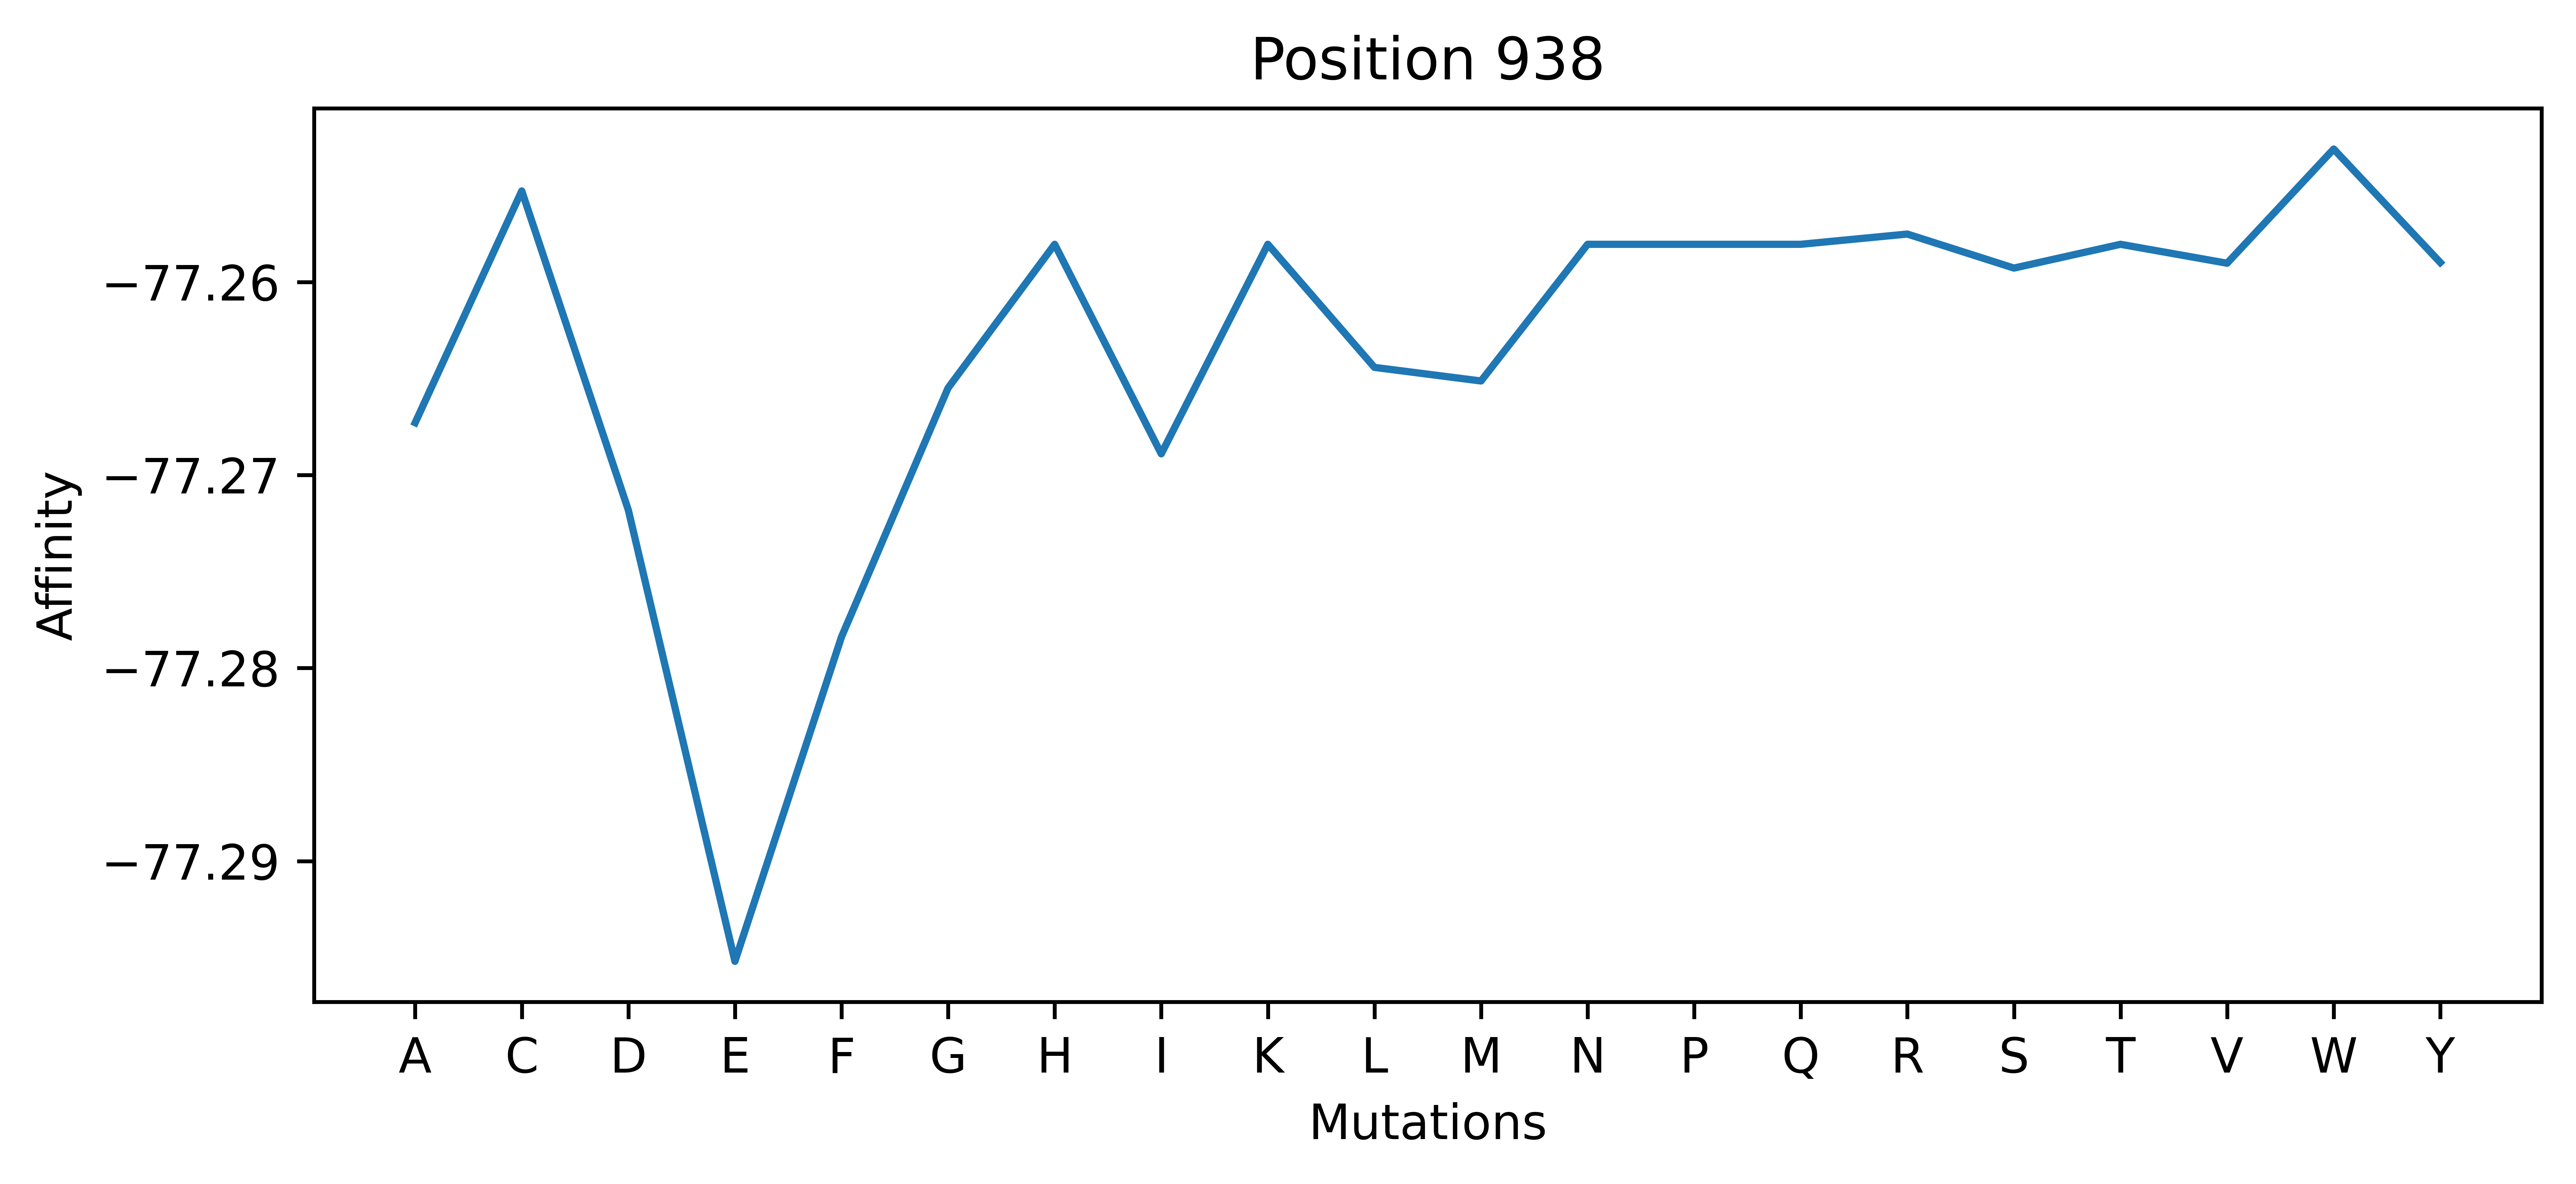

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 938")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_938_final)

In [ ]:
data_check_839 = [[839, 'D', 'A'], [839, 'D', 'C'], [839, 'D', 'D'], [839, 'D', 'E'], [839, 'D', 'F'], [839, 'D', 'G'], [839, 'D', 'H'], [839, 'D', 'I'], [839, 'D', 'K'], [839, 'D', 'L'], [839, 'D', 'M'], [839, 'D', 'N'], [839, 'D', 'P'], [839, 'D', 'Q'], [839, 'D', 'R'], [839, 'D', 'S'], [839, 'D', 'T'], [839, 'D', 'V'], [839, 'D', 'W'], [839, 'D', 'Y'], [346, 'I', 'G'], [346, 'A', 'A'], [346, 'C', 'C'], [346, 'D', 'D'], [346, 'E', 'E'], [346, 'F', 'F'], [346, 'G', 'I'], [346, 'H', 'H'], [346, 'K', 'K'], [346, 'L', 'L'], [346, 'A', 'M'], [346, 'N', 'N'], [346, 'P', 'P'], [346, 'Q', 'Q'], [346, 'R', 'R'], [346, 'S', 'S'], [346, 'T', 'T'], [346, 'V', 'V'], [346, 'W', 'W'], [346, 'Y', 'Y']]
df = pd.DataFrame(data_check_839, columns=['position', 'initial', 'mutated'])
data_encoded_check_839 = pd.get_dummies(df, columns = ['initial', 'mutated'])
check_839 = data_encoded_check_839.loc[0]
data_encoded_check_839.head()

position  initial_A  initial_C  initial_D  initial_E  initial_F  initial_G  \
0       839          0          0          1          0          0          0   
1       839          0          0          1          0          0          0   
2       839          0          0          1          0          0          0   
3       839          0          0          1          0          0          0   
4       839          0          0          1          0          0          0   

   initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  mutated_P  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  mutated_W  mutated_Y  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 40 columns]

In [ ]:
predicted_839 = rgg.predict(data_encoded_check_839)
predicted_839

array([-77.26729421, -77.25528839, -77.27182059, -77.29519682,
       -77.27838839, -77.26549306, -77.258052  , -77.26890723,
       -77.258052  , -77.26442785, -77.26513268, -77.258052  ,
       -77.258052  , -77.258052  , -77.25752136, -77.25928387,
       -77.258052  , -77.25903206, -77.25311699, -77.25899421,
       -78.3284259 , -77.29269144, -79.02720186, -79.11763326,
       -79.1580798 , -79.03681521, -79.27519584, -78.85605977,
       -80.69130111, -79.49631418, -78.05144679, -79.19458457,
       -77.0175434 , -79.33985423, -80.36986315, -78.75216079,
       -79.8988471 , -79.14493984, -79.19220534, -79.18319313])

In [ ]:
predicted_839_final = predicted_839[0:20]
predicted_839_final

array([-77.26729421, -77.25528839, -77.27182059, -77.29519682,
       -77.27838839, -77.26549306, -77.258052  , -77.26890723,
       -77.258052  , -77.26442785, -77.26513268, -77.258052  ,
       -77.258052  , -77.258052  , -77.25752136, -77.25928387,
       -77.258052  , -77.25903206, -77.25311699, -77.25899421])

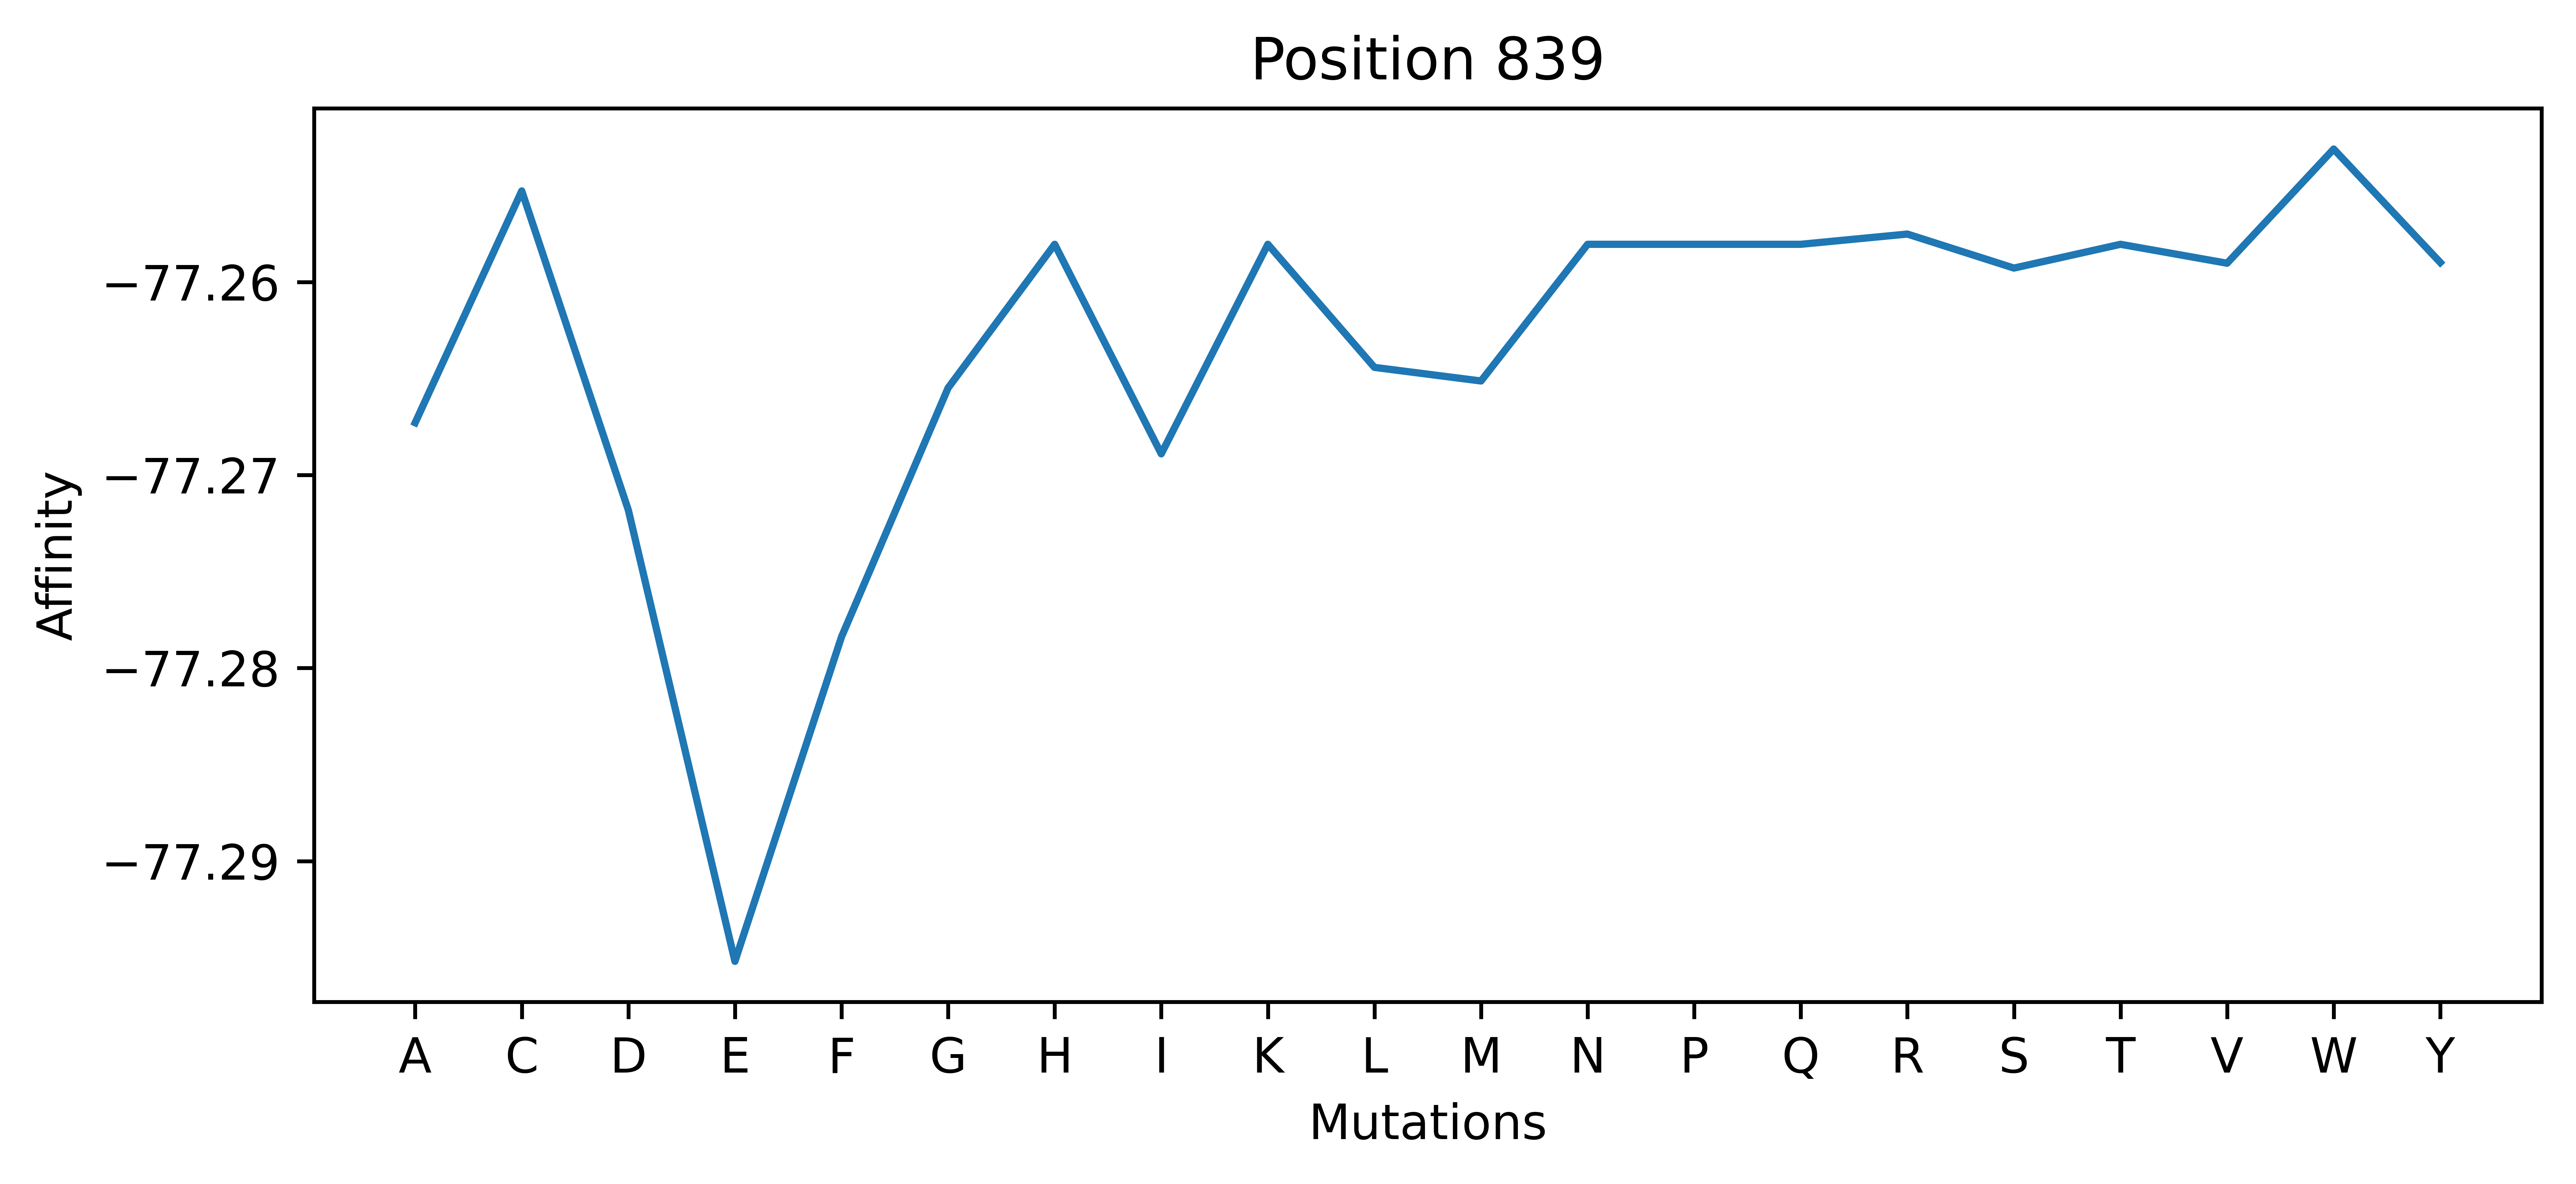

In [ ]:
X_label = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
plt.xlabel("Mutations")
plt.ylabel("Affinity")
plt.title("Position 839")
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(X_label, predicted_839_final)

In [ ]:
predicted = rgg.predict(X_test)

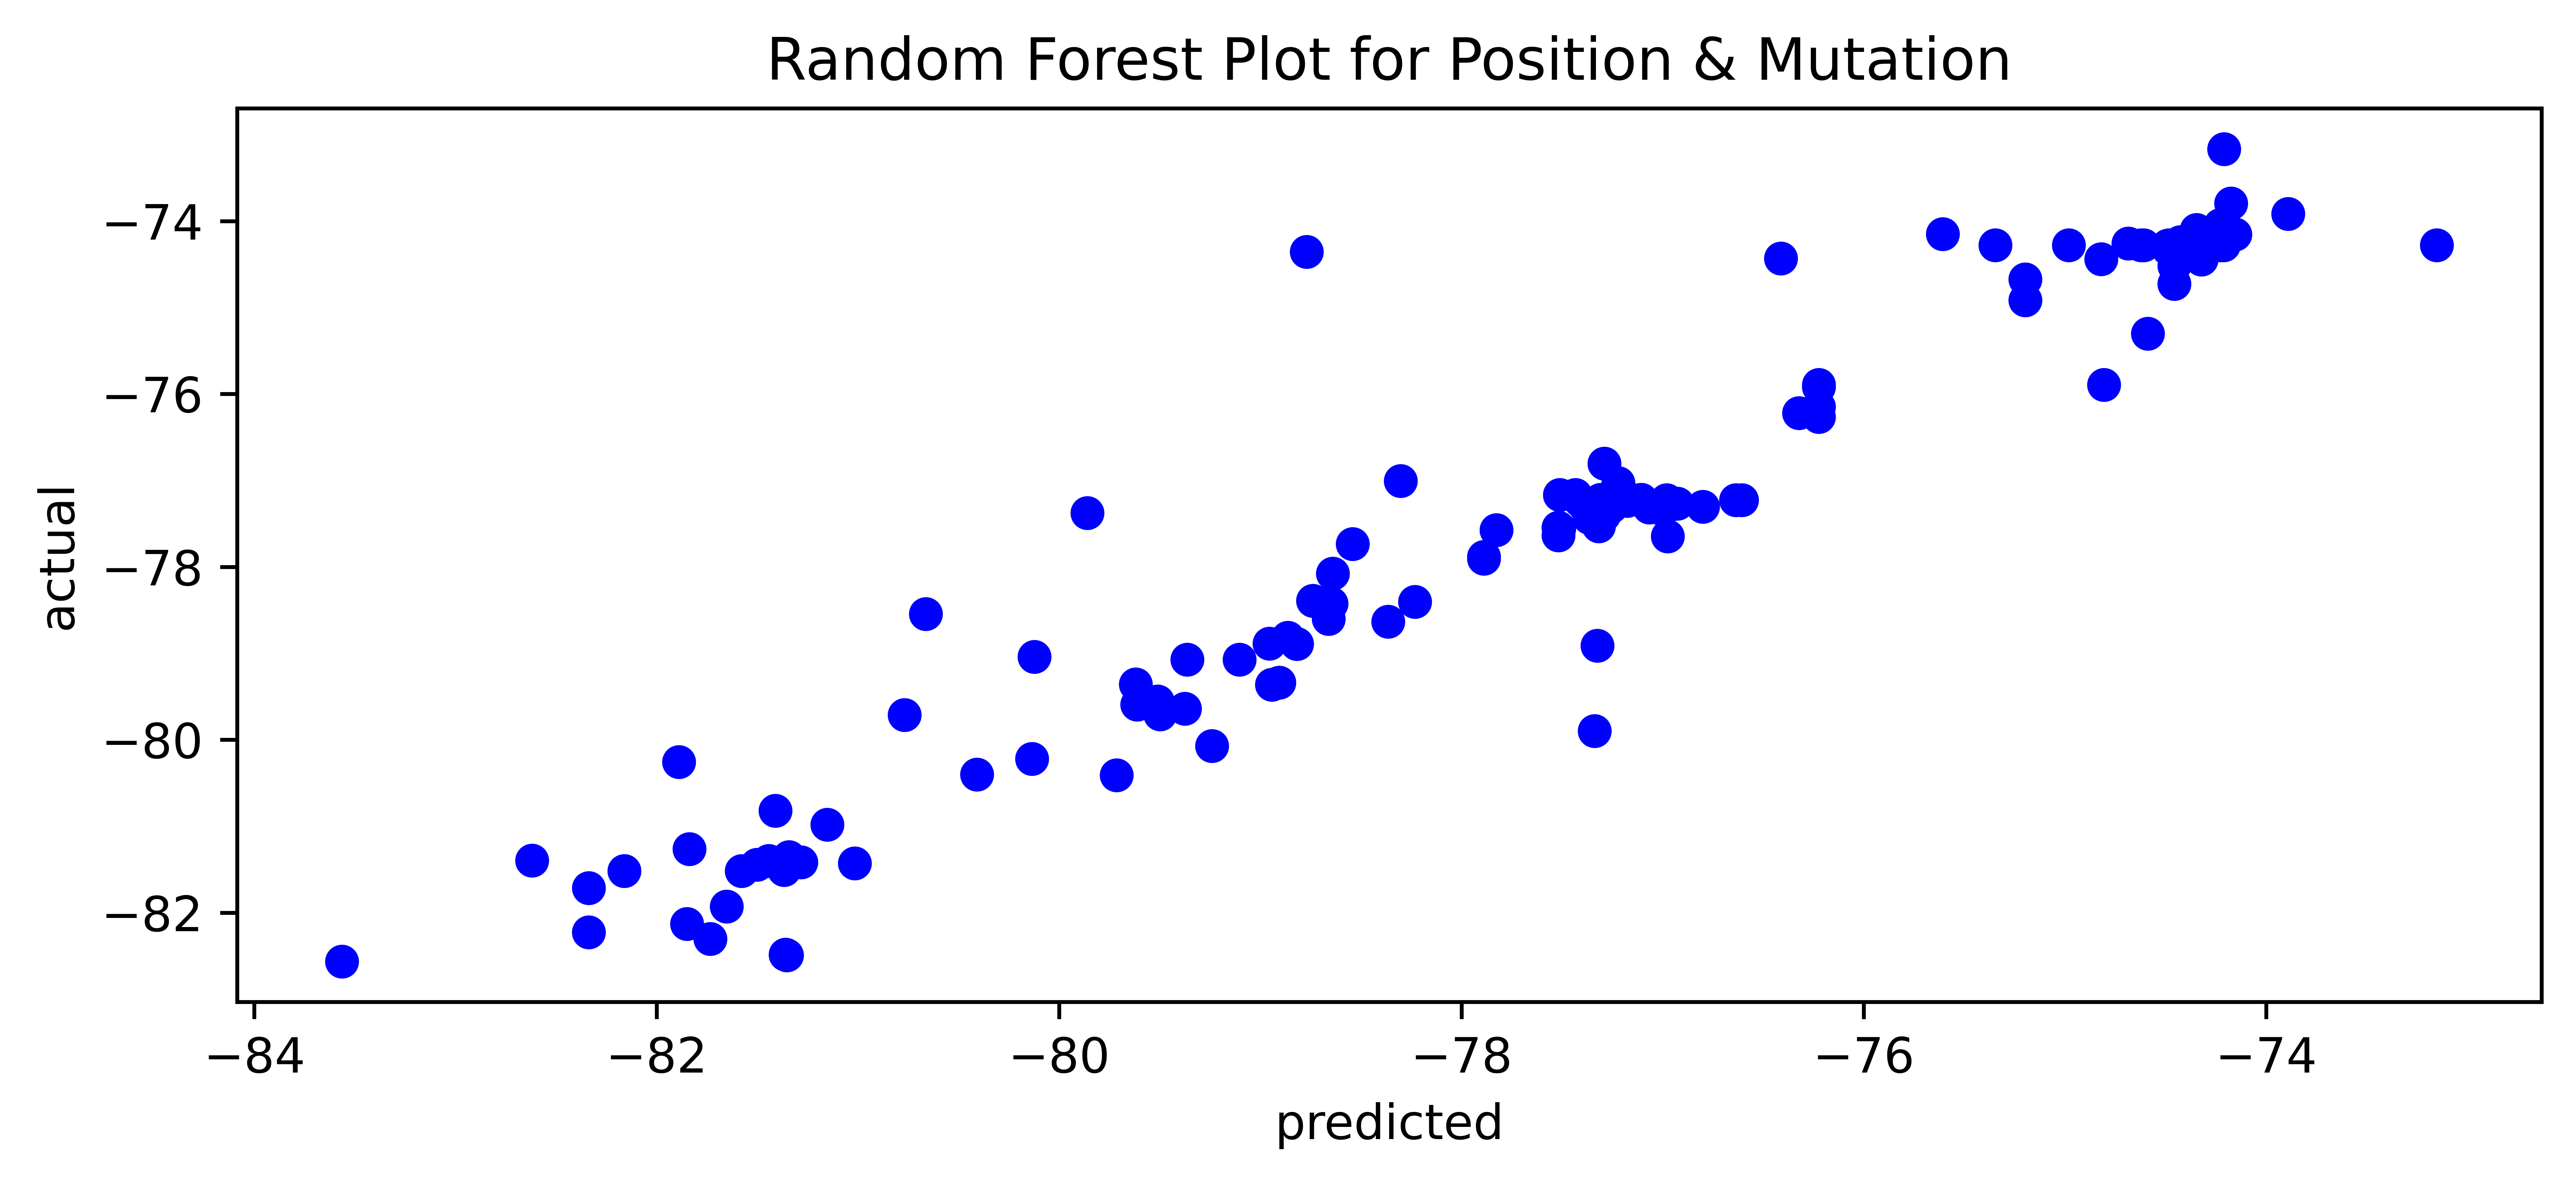

In [ ]:
plt.scatter(predicted, y_test, color = 'blue')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random Forest Plot for Position & Mutation')
plt.rcParams['figure.dpi']=1000

The parameters of the line: [ 0.97312019 -1.99298882]


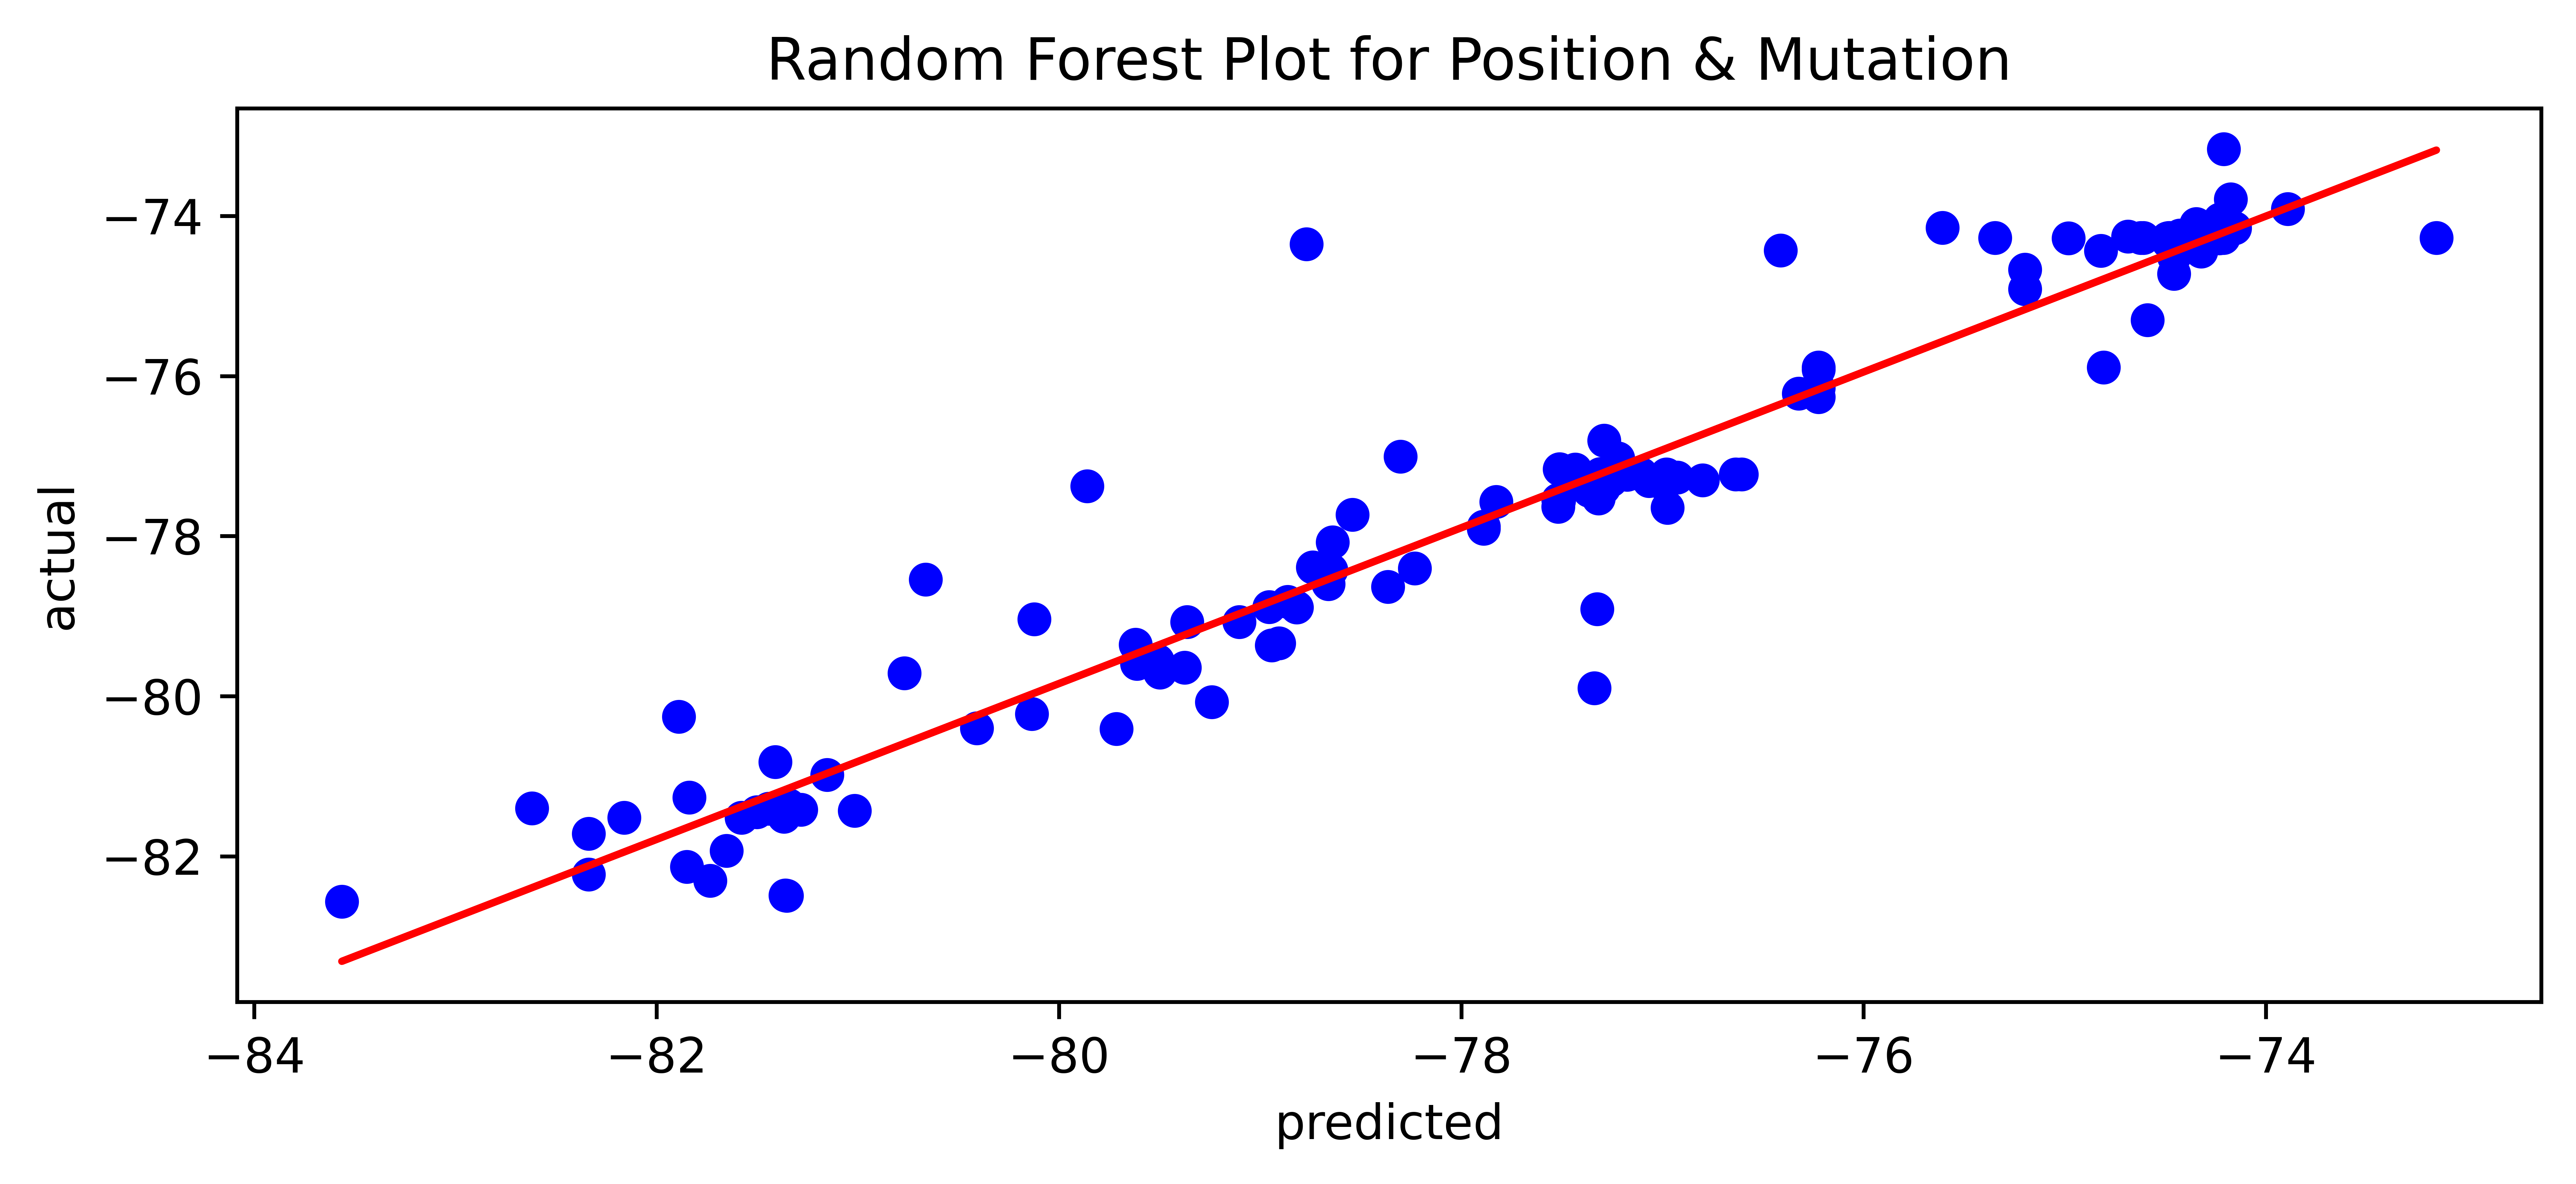

In [ ]:
theta = np.polyfit(predicted, y_test, 1)
print(f'The parameters of the line: {theta}')
y_line = theta[1] + theta[0] * predicted
plt.scatter(predicted, y_test, color="blue")
plt.plot(predicted, y_line, 'r')
plt.title('Random Forest Plot for Position & Mutation')
plt.xlabel('predicted')
plt.ylabel('actual')

plt.show()

In [ ]:
np.printoptions(precision=2)
print(predicted)

[-82.1611015  -81.01621931 -74.28662181 -77.01154355 -82.33757726
 -74.62181302 -74.22369523 -77.27781166 -78.63916618 -77.30963068
 -77.37937766 -77.23047809 -77.5187461  -74.30664032 -77.31628401
 -78.54136155 -79.36282109 -78.30209682 -74.60898612 -77.22880067
 -77.2896313  -77.40934827 -76.60684113 -77.31526645 -74.27588498
 -74.2762924  -74.34634283 -74.228157   -76.79992633 -78.94297327
 -77.3087241  -74.34955279 -83.56510746 -74.30253168 -77.25447052
 -74.42723113 -74.27519423 -77.22498686 -77.23532106 -77.22490288
 -74.3362358  -75.60714114 -76.32253107 -74.48598041 -76.22306158
 -77.29122549 -77.23997763 -77.19565914 -81.88948584 -78.36511745
 -76.22306158 -74.17472877 -81.4101376  -80.76733388 -77.32468792
 -81.73322746 -77.22970785 -74.30712003 -81.35288567 -74.98186467
 -77.21921877 -74.45647301 -77.24704445 -77.29122601 -74.27389737
 -77.33787076 -74.31652094 -77.23519498 -77.21703235 -77.22488224
 -77.21729375 -74.33486595 -77.21308801 -81.50119218 -74.58794101
 -79.61981

In [ ]:
X_test

position  initial_A  initial_C  initial_D  initial_E  initial_F  \
210       357          0          0          0          0          0   
58        339          0          0          1          0          0   
943       496          0          0          0          0          0   
584       432          0          1          0          0          0   
218       358          0          0          0          0          0   
..        ...        ...        ...        ...        ...        ...   
718       449          0          0          0          0          0   
965       498          0          0          0          0          0   
224       359          0          0          0          0          0   
298       373          0          0          0          0          0   
649       441          0          0          0          0          0   

     initial_G  initial_H  initial_I  initial_K  ...  mutated_M  mutated_N  \
210          0          0          0          0  ...          0          0   
58           0          0          0          0  ...          0          0   
943          0          0          0          0  ...          0          0   
584          0          0          0          0  ...          0          0   
218          0          0          1          0  ...          0          0   
..         ...        ...        ...        ...  ...        ...        ...   
718          0          0          0          0  ...          0          0   
965          0          0          0          0  ...          0          0   
224          0          0          0          0  ...          0          0   
298          0          0          0          0  ...          0          0   
649          0          0          0          0  ...          0          0   

     mutated_P  mutated_Q  mutated_R  mutated_S  mutated_T  mutated_V  \
210          0          0          0          0          0          0   
58           0          0          0          0          0          1   
943          0          0          0          0          0          0   
584          0          0          0          1          0          0   
218          0          0          0          1          0          0   
..         ...        ...        ...        ...        ...        ...   
718          0          0          0          0          0          0   
965          1          0          0          0          0          0   
224          0          0          0          0          0          0   
298          0          1          0          0          0          0   
649          0          0          0          0          0          0   

     mutated_W  mutated_Y  
210          1          0  
58           0          0  
943          0          0  
584          0          0  
218          0          0  
..         ...        ...  
718          0          0  
965          0          0  
224          0          0  
298          0          0  
649          0          0  

[236 rows x 40 columns]

In [ ]:
print(y_test)

210   -81.518507
58    -81.428633
943   -74.275168
584   -77.324162
218   -81.715161
         ...    
718   -74.279883
965   -74.178485
224   -81.504878
298   -73.915497
649   -73.165248
Name: Affinity, Length: 236, dtype: float64


In [ ]:
data_encoded.cov()

<ipython-input-100-5eb502bef3e0>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_encoded.cov()


Affinity  dAffinity     Stability  dStability  first_integer  \
Affinity         5.689420   0.439893    240.070051   -0.156162       0.997882   
dAffinity        0.439893   0.570360    -20.133164    0.102238      -0.012305   
Stability      240.070051 -20.133164  24034.997257  -12.424965      56.128724   
dStability      -0.156162   0.102238    -12.424965    1.185644      -0.009583   
first_integer    0.997882  -0.012305     56.128724   -0.009583       0.507999   
position        81.703209  -0.681068   4376.542903   -0.969865      39.927934   
initial_A        0.032355  -0.003027     -0.381284   -0.021367      -0.013985   
initial_C       -0.066555   0.003224     -4.563254    0.075996      -0.006164   
initial_D       -0.042871  -0.006849      1.692608   -0.028462      -0.013881   
initial_E        0.026977   0.008576      2.210567   -0.013516      -0.000226   
initial_F       -0.007228  -0.006275      1.961213    0.032051      -0.000589   
initial_G        0.067176   0.000686      3.525722   -0.019312       0.014976   
initial_H        0.016197   0.000126      0.817628   -0.006724       0.006734   
initial_I       -0.052416   0.009958     -2.939073    0.027920      -0.017481   
initial_K        0.001405   0.002117     -1.700323   -0.013493      -0.006889   
initial_L       -0.024235  -0.014714     -0.735424    0.017574       0.017806   
initial_N       -0.056054  -0.015806     -0.178556   -0.037755      -0.020874   
initial_P        0.057080  -0.011884      3.960587   -0.024692       0.019994   
initial_Q        0.014179   0.000109      0.731986   -0.001230       0.005892   
initial_R       -0.006437   0.026948     -6.596202    0.035909      -0.000815   
initial_S        0.012220  -0.013633      1.157969   -0.064494       0.007051   
initial_T        0.005419   0.014800     -3.099215   -0.011092      -0.000291   
initial_V        0.029300   0.001680      2.063337    0.022150       0.014452   
initial_W       -0.005584   0.000096     -0.117452    0.010760      -0.005167   
initial_Y       -0.000927   0.003869      2.189164    0.019779      -0.000543   
mutated_A        0.033409   0.009952      1.383371   -0.016055       0.003005   
mutated_C       -0.001247   0.002614     -0.026750    0.015862       0.000486   
mutated_D        0.009486   0.000188      1.509756    0.005838      -0.002091   
mutated_E        0.012003  -0.002923      0.999713   -0.002740      -0.000265   
mutated_F       -0.014567  -0.002616     -0.088165   -0.008396       0.001218   
mutated_G        0.011554   0.011848      0.000246    0.049525      -0.002046   
mutated_H       -0.003654  -0.002825      0.685071    0.013853       0.001321   
mutated_I       -0.013431  -0.000713     -0.942041   -0.033980      -0.002169   
mutated_K       -0.012727  -0.002581     -0.910081    0.009448      -0.004500   
mutated_L        0.005366  -0.002644      0.450317   -0.033610       0.005439   
mutated_M        0.001389   0.008939     -1.165046    0.001010       0.000525   
mutated_N       -0.014991   0.002972     -0.706334    0.007576      -0.006280   
mutated_P        0.022311   0.006669     -0.084483    0.004029       0.004746   
mutated_Q        0.004383  -0.007545      0.269919   -0.000726       0.004850   
mutated_R       -0.003719  -0.002212     -0.980497   -0.003366       0.003024   
mutated_S       -0.000105   0.003888     -0.261668    0.053652      -0.001534   
mutated_T       -0.001692  -0.002824     -0.770157   -0.017157      -0.003774   
mutated_V        0.010711   0.004945      0.993268   -0.025734      -0.000459   
mutated_W       -0.014413  -0.010508     -0.691912    0.004661       0.002266   
mutated_Y       -0.030065  -0.014623      0.335472   -0.023692      -0.003761   

                  position  initial_A  initial_C  initial_D  initial_E  ...  \
Affinity         81.703209   0.032355  -0.066555  -0.042871   0.026977  ...   
dAffinity        -0.681068  -0.003027   0.003224  -0.006849   0.008576  ...   
Stability      4376.542903  -0.381284  -4.563254   1.

In [ ]:
data_encoded.corr(method='pearson')

<ipython-input-101-9530238ceb4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_encoded.corr(method='pearson')


Affinity  dAffinity  Stability  dStability  first_integer  \
Affinity       1.000000   0.244196   0.649205   -0.060126       0.586967   
dAffinity      0.244196   1.000000  -0.171955    0.124326      -0.022860   
Stability      0.649205  -0.171955   1.000000   -0.073603       0.507962   
dStability    -0.060126   0.124326  -0.073603    1.000000      -0.012348   
first_integer  0.586967  -0.022860   0.507962   -0.012348       1.000000   
position       0.570230  -0.015013   0.469953   -0.014828       0.932589   
initial_A      0.059866  -0.017692  -0.010854   -0.086606      -0.086597   
initial_C     -0.164403   0.025156  -0.173426    0.411218      -0.050953   
initial_D     -0.090945  -0.045891   0.055244   -0.132265      -0.098549   
initial_E      0.066637   0.066910   0.084012   -0.073135      -0.001872   
initial_F     -0.011354  -0.031133   0.047399    0.110289      -0.003095   
initial_G      0.146986   0.004738   0.118692   -0.092564       0.109663   
initial_H      0.082716   0.002034   0.064243   -0.075218       0.115082   
initial_I     -0.087375   0.052428  -0.075378    0.101951      -0.097520   
initial_K      0.005091   0.024228  -0.094792   -0.107100      -0.083537   
initial_L     -0.032220  -0.061785  -0.015043    0.051182       0.079225   
initial_N     -0.093438  -0.083215  -0.004579   -0.137865      -0.116446   
initial_P      0.112505  -0.073979   0.120104   -0.106611       0.131883   
initial_Q      0.077376   0.001875   0.061458   -0.014708       0.107604   
initial_R     -0.008735   0.115489  -0.137710    0.106737      -0.003702   
initial_S      0.019293  -0.067978   0.028128   -0.223053       0.037257   
initial_T      0.011856   0.102276  -0.104333   -0.053166      -0.002132   
initial_V      0.039759   0.007198   0.043077    0.065840       0.065628   
initial_W     -0.023325   0.001266  -0.007548    0.098455      -0.072221   
initial_Y     -0.001512   0.019913   0.054892    0.070611      -0.002964   
mutated_A      0.063729   0.059960   0.040600   -0.067088       0.019181   
mutated_C     -0.002458   0.016270  -0.000811    0.068485       0.003205   
mutated_D      0.017955   0.001125   0.043965    0.024206      -0.013244   
mutated_E      0.027467  -0.021128   0.035196   -0.013734      -0.002031   
mutated_F     -0.025180  -0.014282  -0.002345   -0.031789       0.007044   
mutated_G      0.023170   0.075043   0.000008    0.217560      -0.013729   
mutated_H     -0.007084  -0.017294   0.020432    0.058824       0.008570   
mutated_I     -0.023363  -0.003920  -0.025212   -0.129481      -0.012624   
mutated_K     -0.029471  -0.018876  -0.032425    0.047926      -0.034871   
mutated_L      0.009105  -0.014171   0.011756   -0.124927       0.030886   
mutated_M      0.002889   0.058732  -0.037290    0.004602       0.003653   
mutated_N     -0.030331   0.018995  -0.021988    0.033578      -0.042524   
mutated_P      0.045143   0.042617  -0.002630    0.017858       0.032137   
mutated_Q      0.010540  -0.057303   0.009986   -0.003822       0.039026   
mutated_R     -0.007269  -0.013654  -0.029485   -0.014410       0.019780   
mutated_S     -0.000154   0.017999  -0.005900    0.172247      -0.007523   
mutated_T     -0.003254  -0.017149  -0.022784   -0.072264      -0.024288   
mutated_V      0.018876   0.027521   0.026931   -0.099343      -0.002709   
mutated_W     -0.032233  -0.074222  -0.023807    0.022837       0.016962   
mutated_Y     -0.058763  -0.090269   0.010088   -0.101436      -0.024603   

               position  initial_A  initial_C  initial_D  initial_E  ...  \
Affinity       0.570230   0.059866  -0.164403  -0.090945   0.066637  ...   
dAffinity     -0.015013  -0.017692   0.025156  -0.045891   0.066910  ...   
Stability      0.469953  -0.010854  -0.173426   0.055244   0.084012  ...   
dStability    -0.014828  -0.086606   0.411218  -0.132265  -0.073135  ...   
first_integer  0.932589  -0.086597  -0.050953  -0.098549  -0.001872  ...   
position       1.000000  -0.073491  -0.056930  -0.089343   0.0

**Stability**

In [ ]:
X_stability = data_encoded[['Stability']]
X_train_stability, X_test_stability, y_train_stability, y_test_stability = train_test_split(X_stability, y, test_size=0.20, random_state=42)

In [ ]:
linear_regression_stabilty = LinearRegression()
linear_regression_stabilty.fit(X_train_stability, y_train_stability)
linear_regression_stabilty.score(X_test_stability, y_test_stability)

0.4330128776000476

In [ ]:
regressor_stability = SVR(kernel = "rbf")
regressor_stability.fit(X_train_stability, y_train_stability)
regressor_stability.score(X_test_stability, y_test_stability)

0.7198911533653237

In [ ]:
decision_regressor_stability = DecisionTreeRegressor()
decision_regressor_stability.fit(X_train_stability, y_train_stability)
decision_regressor_stability.score(X_test_stability, y_test_stability)

0.7392734768861324

In [ ]:
rgg_stability = RandomForestRegressor(random_state = 0)
rgg_stability.fit(X_train_stability, y_train_stability)
rgg_stability.score(X_test_stability, y_test_stability)

0.8377698622775454

In [ ]:
predicted_stability = rgg_stability.predict(X_test_stability)

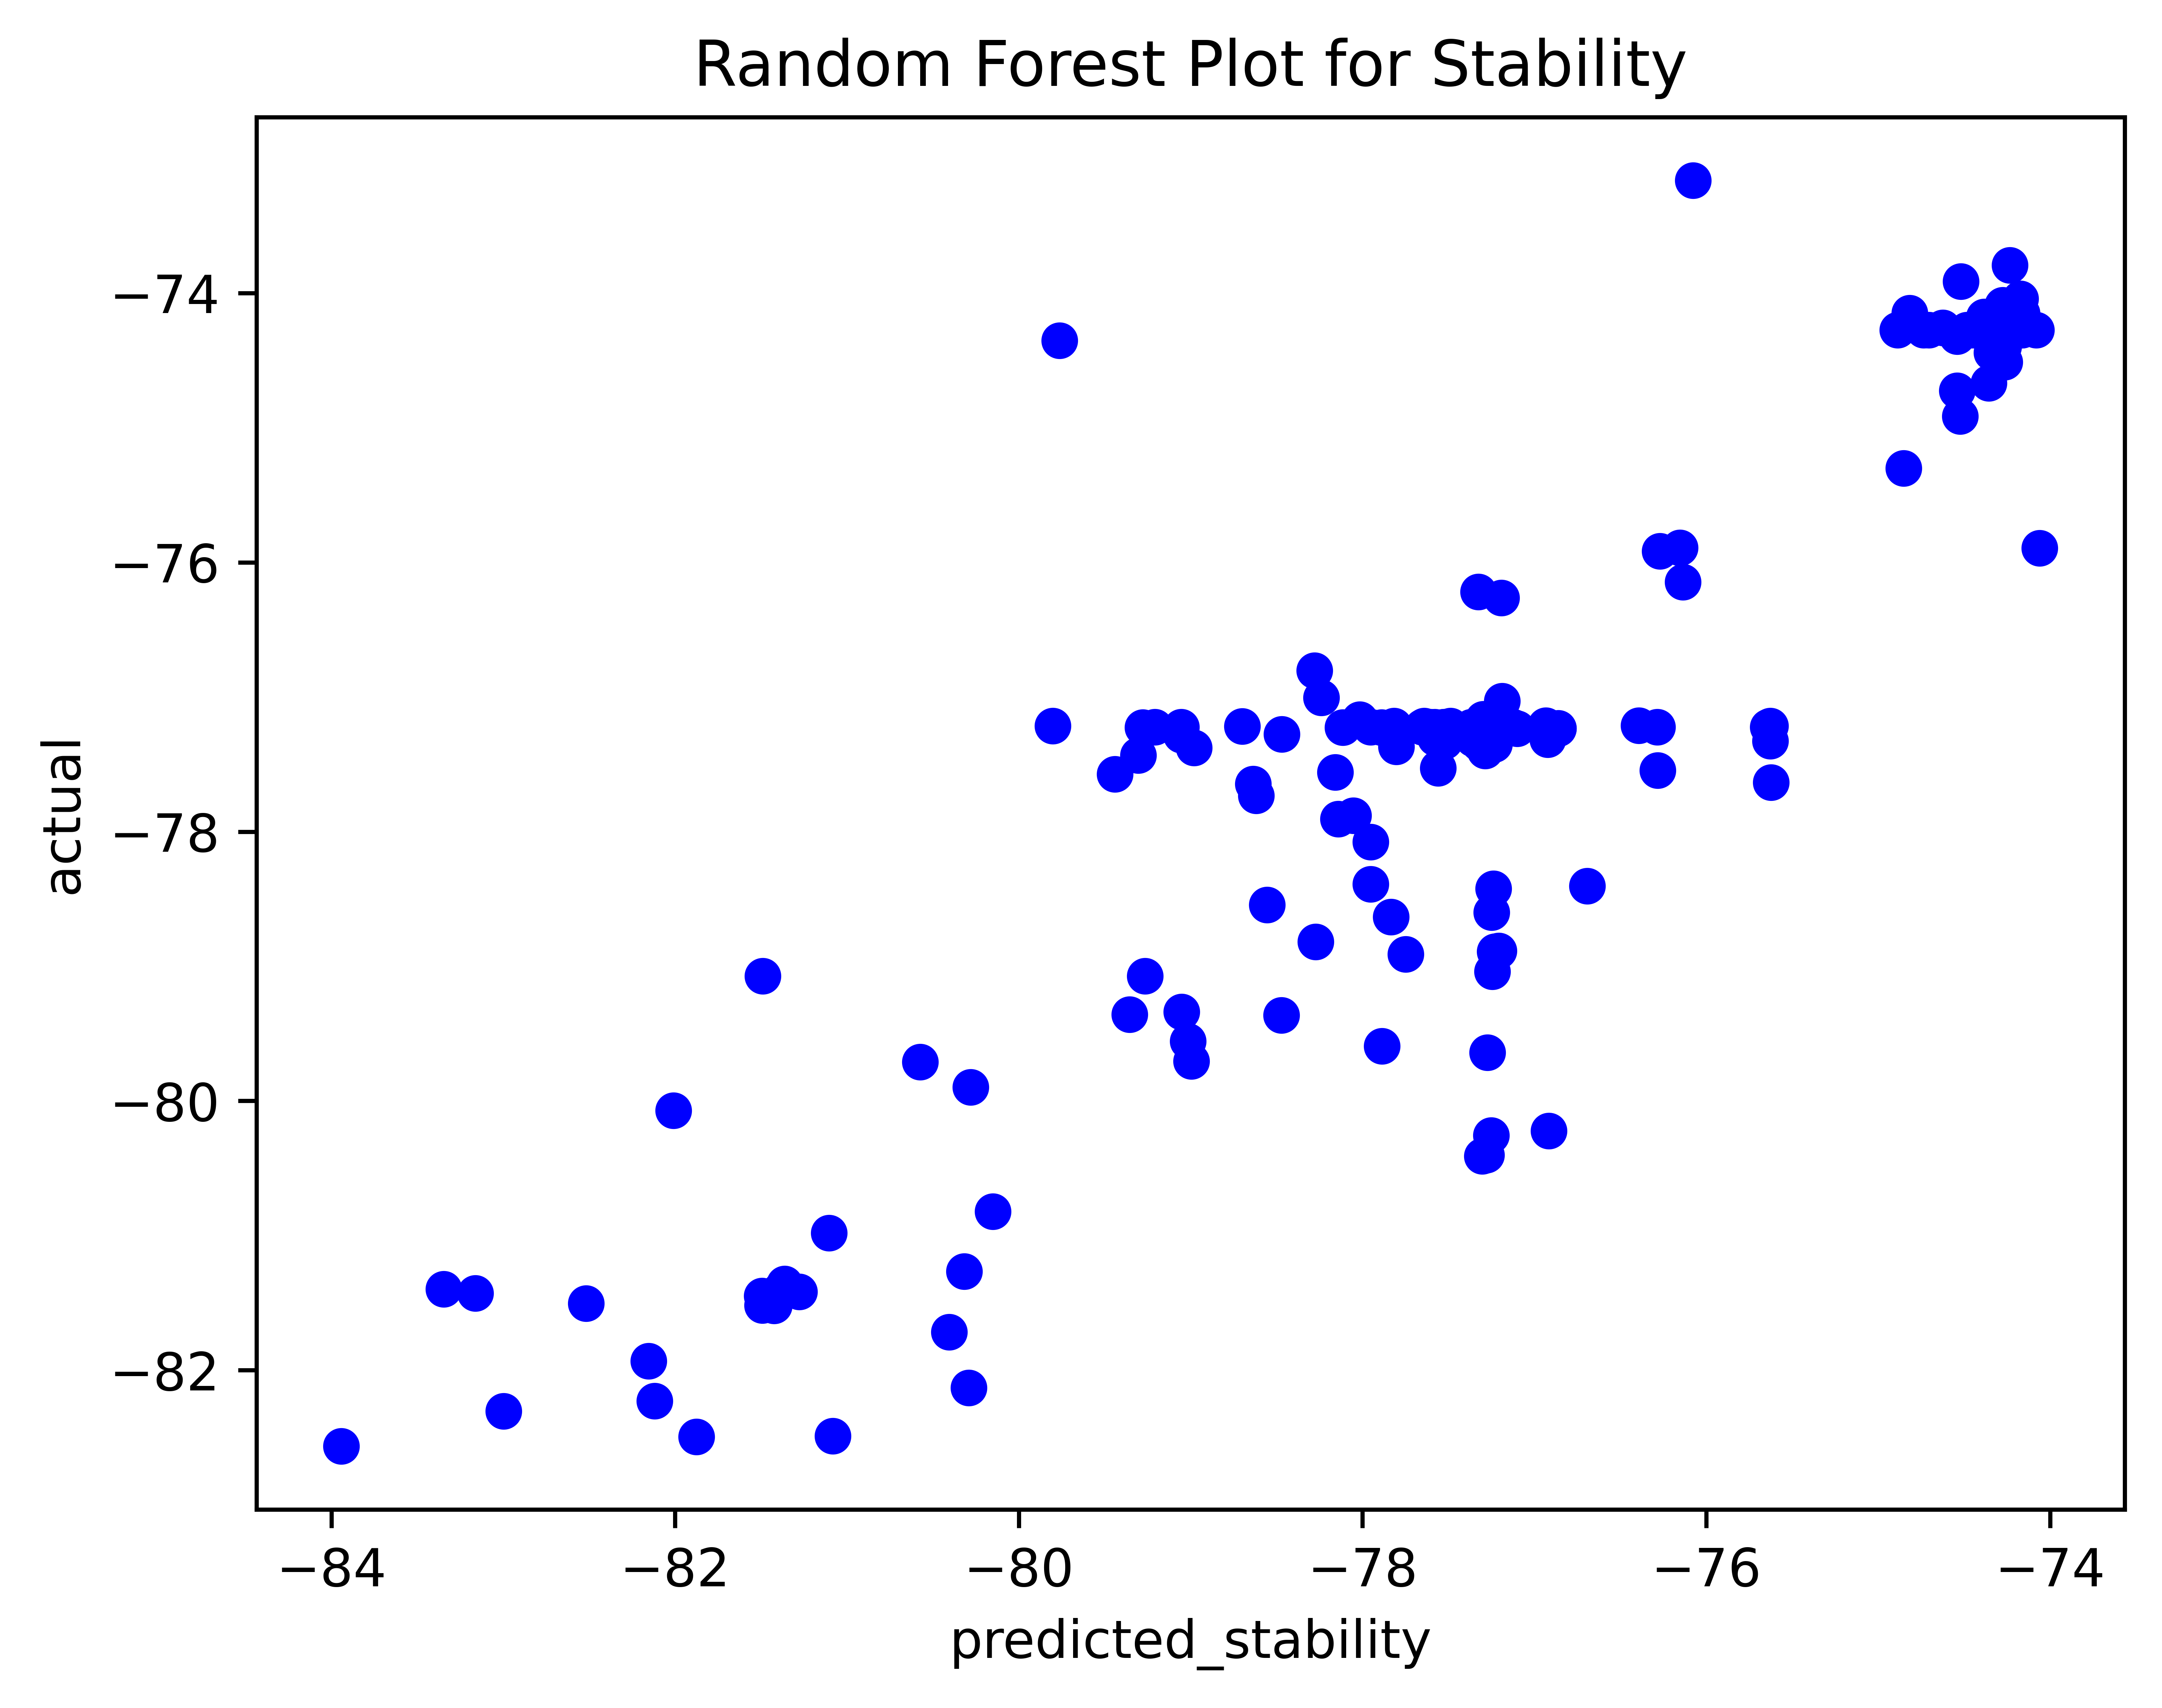

In [ ]:
plt.scatter(predicted_stability, y_test_stability, color = 'blue')
plt.xlabel('predicted_stability')
plt.ylabel('actual')
plt.title('Random Forest Plot for Stability')
plt.rcParams['figure.dpi']=1000
plt.rcParams["figure.figsize"] = [7.50, 3.50]

The parameters of the line: [ 0.91508329 -6.48711611]


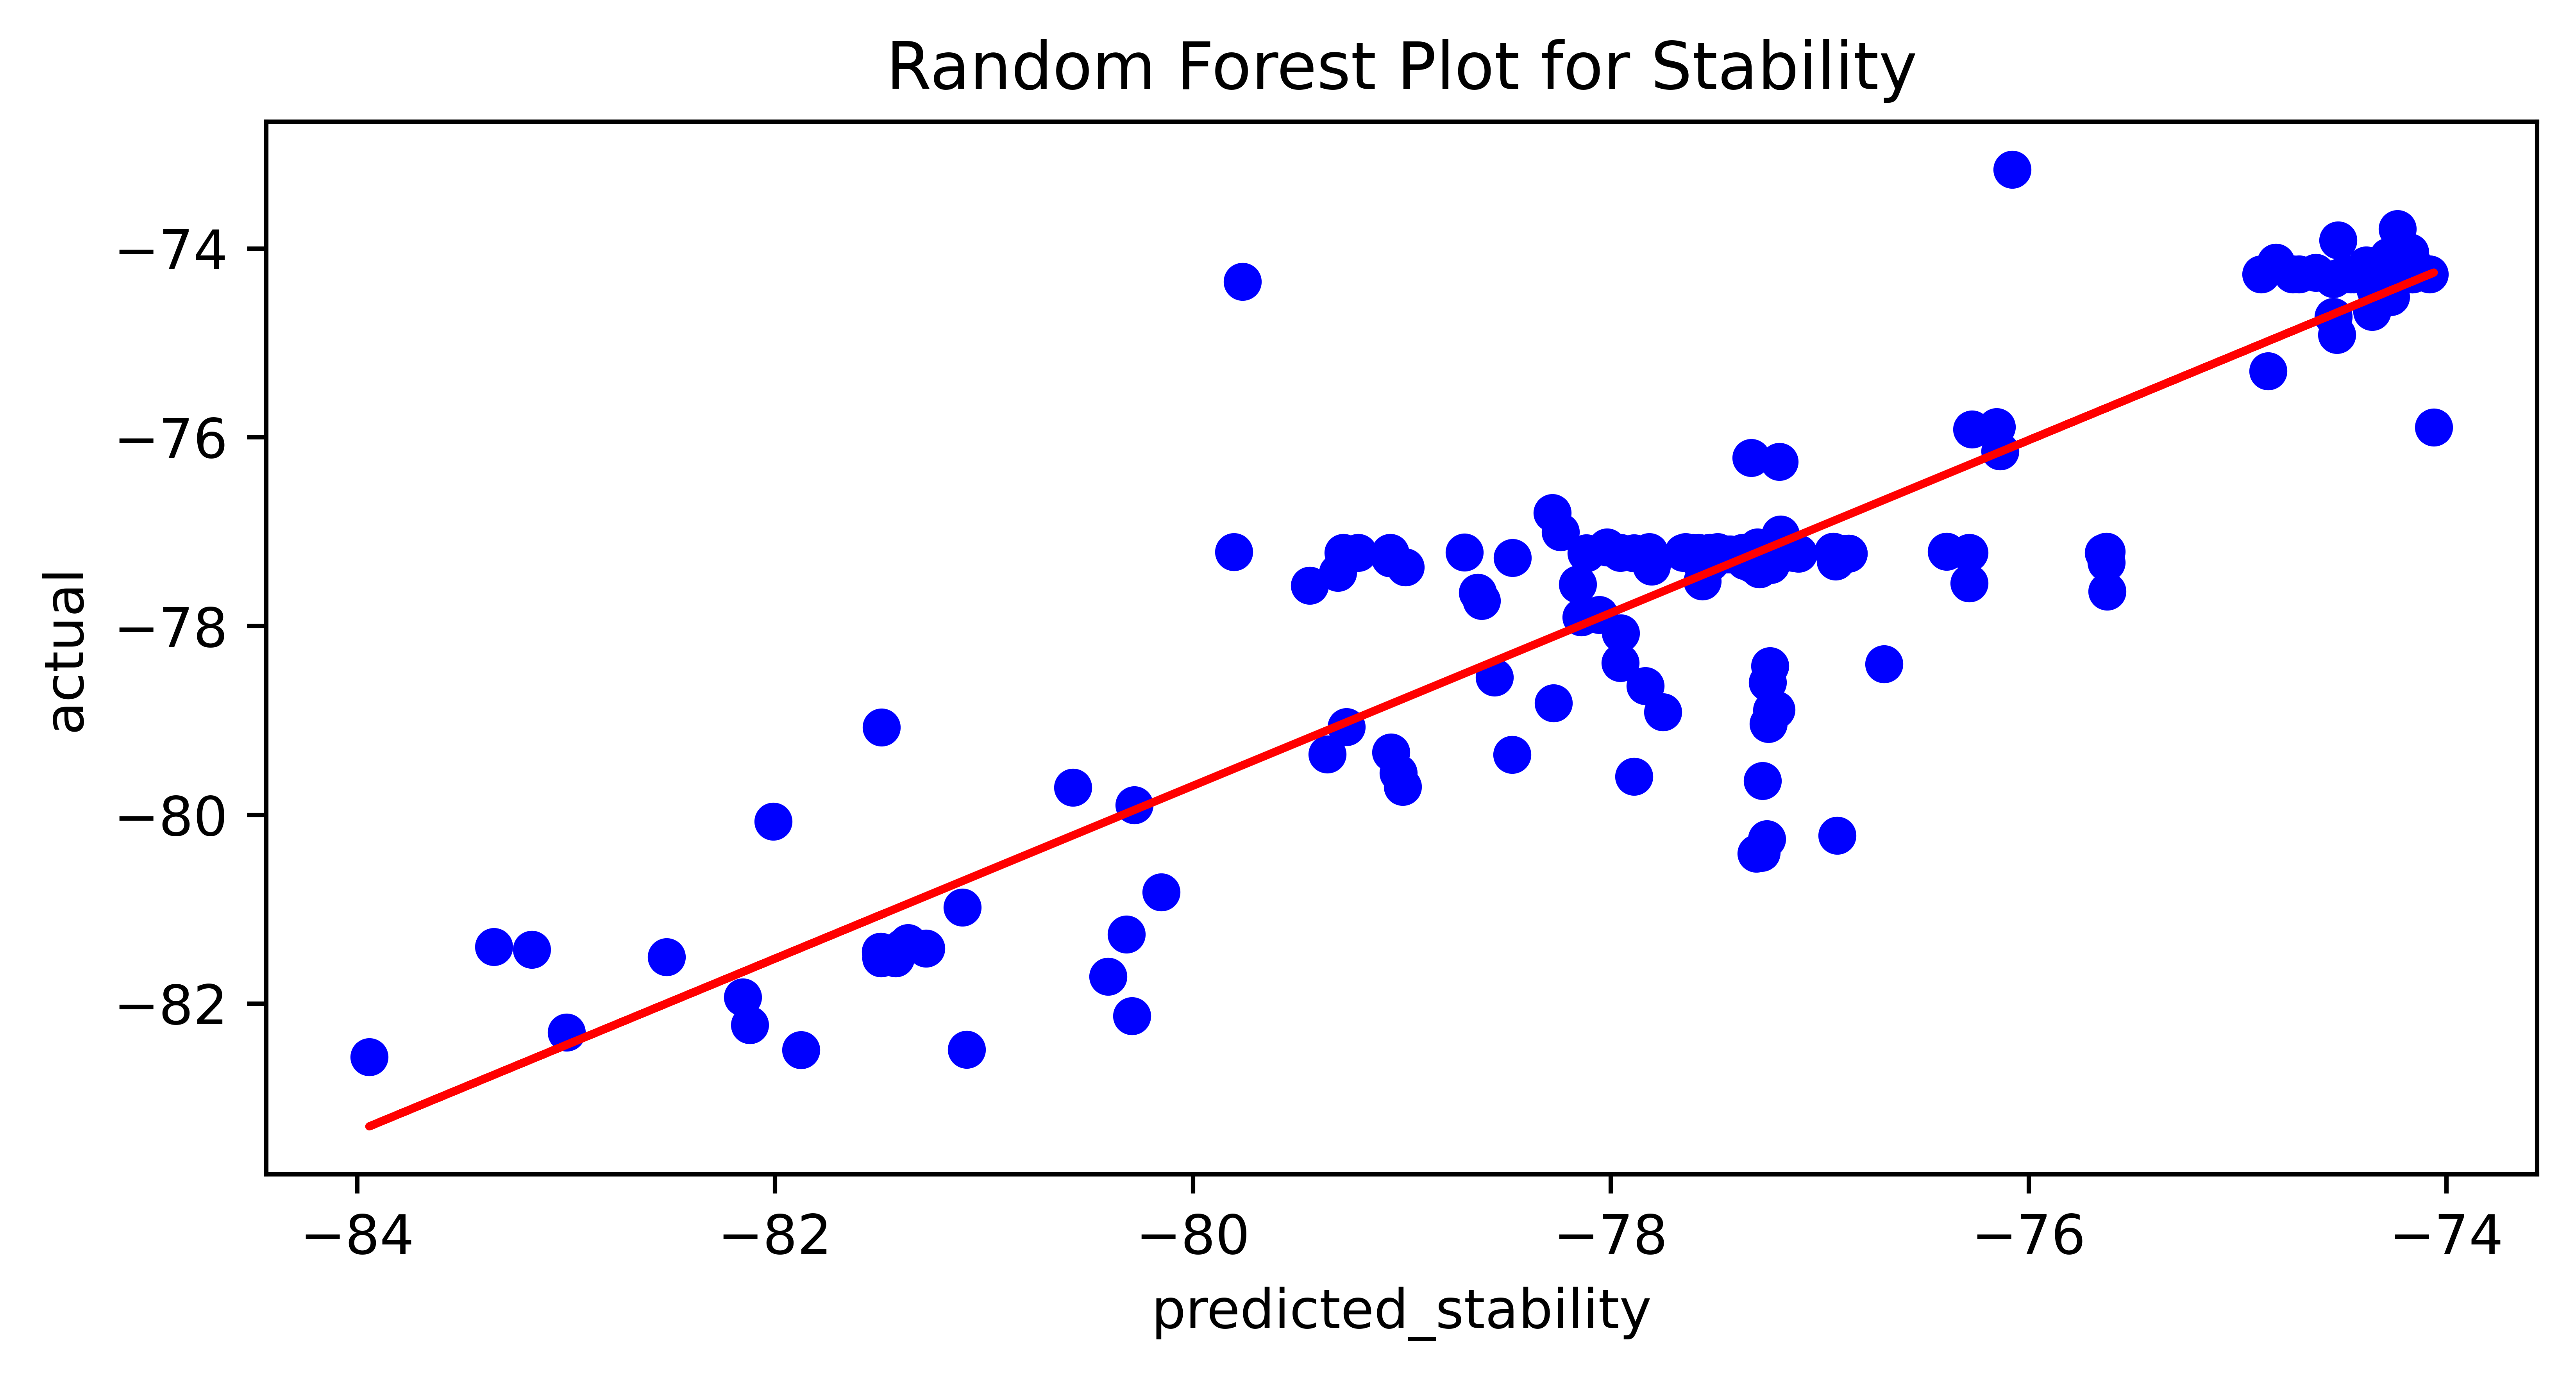

In [ ]:
theta = np.polyfit(predicted_stability, y_test_stability, 1)
print(f'The parameters of the line: {theta}')
y_line = theta[1] + theta[0] * predicted_stability
plt.scatter(predicted_stability, y_test_stability, color="blue")
plt.plot(predicted_stability, y_line, 'r')
plt.title('Random Forest Plot for Stability')
plt.xlabel('predicted_stability')
plt.ylabel('actual')

plt.show()

**dStability**

In [ ]:
X_dstability = data_encoded[['dStability']]
X_train_dstability, X_test_dstability, y_train_dstability, y_test_dstability = train_test_split(X_dstability, y, test_size=0.20, random_state=42)

In [ ]:
linear_regression_dstabilty = LinearRegression()
linear_regression_dstabilty.fit(X_train_dstability, y_train_dstability)
linear_regression_dstabilty.score(X_test_dstability, y_test_dstability)

0.005165957722974013

In [ ]:
regressor_dstability = SVR(kernel = "rbf")
regressor_dstability.fit(X_train_dstability, y_train_dstability)
regressor_dstability.score(X_test_dstability, y_test_dstability)

-0.016752245847925895

In [ ]:
decision_regressor_dstability = DecisionTreeRegressor()
decision_regressor_dstability.fit(X_train_dstability, y_train_dstability)
decision_regressor_dstability.score(X_test_dstability, y_test_dstability)

-0.9043065075447798

In [ ]:
rgg_dstability = RandomForestRegressor(random_state = 0)
rgg_dstability.fit(X_train_dstability, y_train_dstability)
rgg_dstability.score(X_test_dstability, y_test_dstability)

-0.40083738554837245

In [ ]:
predicted_dstability = rgg_dstability.predict(X_test_dstability)

Text(0.5, 1.0, 'Random Forest Plot for dStability')

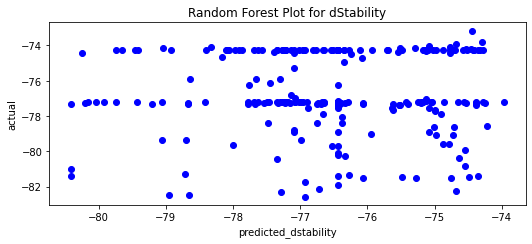

In [ ]:
plt.scatter(predicted_dstability, y_test_dstability, color = 'blue')
plt.xlabel('predicted_dstability')
plt.ylabel('actual')
plt.title('Random Forest Plot for dStability')

**dAffinity**

In [ ]:
X_dAffinity = data_encoded[['dAffinity']]
X_train_dAffinity, X_test_dAffinity, y_train_dAffinity, y_test_dAffinity = train_test_split(X_dAffinity, y, test_size=0.20, random_state=42)

In [ ]:
linear_regression_dAffinity = LinearRegression()
linear_regression_dAffinity.fit(X_train_dAffinity, y_train_dAffinity)
linear_regression_dAffinity.score(X_test_dAffinity, y_test_dAffinity)

-0.032993704797887435

In [ ]:
regressor_dAffinity = SVR(kernel = "rbf")
regressor_dAffinity.fit(X_train_dAffinity, y_train_dAffinity)
regressor_dAffinity.score(X_test_dAffinity, y_test_dAffinity)

0.027683510144280943

In [ ]:
decision_regressor_dAffinity = DecisionTreeRegressor()
decision_regressor_dAffinity.fit(X_train_dAffinity, y_train_dAffinity)
decision_regressor_dAffinity.score(X_test_dAffinity, y_test_dAffinity)

-0.3154871823251941

In [ ]:
rgg_dAffinity = RandomForestRegressor(random_state = 0)
rgg_dAffinity.fit(X_train_dAffinity, y_train_dAffinity)
rgg_dAffinity.score(X_test_dAffinity, y_test_dAffinity)

-0.018763862083262417

In [ ]:
predicted_dAffinity = rgg_dAffinity.predict(X_test_dAffinity)

Text(0.5, 1.0, 'Random Forest Plot for dAffinity')

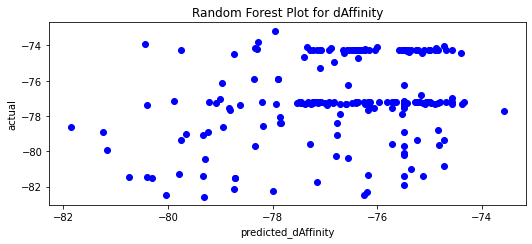

In [ ]:
plt.scatter(predicted_dAffinity, y_test_dAffinity, color = 'blue')
plt.xlabel('predicted_dAffinity')
plt.ylabel('actual')
plt.title('Random Forest Plot for dAffinity')

**Data_2**

In [ ]:
data_2 = pd.read_csv("/content/1-s2.0-S0092867420310035-mmc2.csv")

In [ ]:
null_count_ser = pd.isnull(data_2).sum()
null_count_ser

site_RBD          0
site_SARS2        0
wildtype          0
mutant            0
mutation          0
mutation_RBD      0
bind_lib1       227
bind_lib2       230
bind_avg        218
expr_lib1        38
expr_lib2        37
expr_avg         23
dtype: int64

In [ ]:
data_2.shape[0]  

4221

In [ ]:
data_2 = data_2.dropna()

In [ ]:
null_count_ser_ = pd.isnull(data_2).sum()
null_count_ser_

site_RBD        0
site_SARS2      0
wildtype        0
mutant          0
mutation        0
mutation_RBD    0
bind_lib1       0
bind_lib2       0
bind_avg        0
expr_lib1       0
expr_lib2       0
expr_avg        0
dtype: int64

In [ ]:
data_2.shape[0]

3965

In [ ]:
data_2.describe()

site_RBD   site_SARS2    bind_lib1    bind_lib2     bind_avg  \
count  3965.000000  3965.000000  3965.000000  3965.000000  3965.000000   
mean    100.261286   430.261286    -0.923665    -0.971821    -0.947773   
std      57.691088    57.691088     1.392034     1.413666     1.394066   
min       1.000000   331.000000    -4.760000    -4.840000    -4.800000   
25%      50.000000   380.000000    -1.080000    -1.230000    -1.150000   
50%     100.000000   430.000000    -0.260000    -0.300000    -0.280000   
75%     150.000000   480.000000    -0.040000    -0.050000    -0.050000   
max     201.000000   531.000000     0.360000     0.380000     0.300000   

         expr_lib1    expr_lib2     expr_avg  
count  3965.000000  3965.000000  3965.000000  
mean     -1.038668    -1.006121    -1.022351  
std       1.061846     1.016662     1.026341  
min      -4.150000    -3.990000    -4.070000  
25%      -2.020000    -1.920000    -1.950000  
50%      -0.640000    -0.630000    -0.630000  
75%      -0.110000    -0.120000    -0.120000  
max       0.920000     1.000000     0.740000

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 4219
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   site_RBD      3965 non-null   int64  
 1   site_SARS2    3965 non-null   int64  
 2   wildtype      3965 non-null   object 
 3   mutant        3965 non-null   object 
 4   mutation      3965 non-null   object 
 5   mutation_RBD  3965 non-null   object 
 6   bind_lib1     3965 non-null   float64
 7   bind_lib2     3965 non-null   float64
 8   bind_avg      3965 non-null   float64
 9   expr_lib1     3965 non-null   float64
 10  expr_lib2     3965 non-null   float64
 11  expr_avg      3965 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 402.7+ KB


In [ ]:
data_2.head()

site_RBD  site_SARS2 wildtype mutant mutation mutation_RBD  bind_lib1  \
0         1         331        N      A    N331A          N1A      -0.05   
1         1         331        N      C    N331C          N1C      -0.08   
2         1         331        N      D    N331D          N1D       0.00   
3         1         331        N      E    N331E          N1E       0.02   
4         1         331        N      F    N331F          N1F      -0.03   

   bind_lib2  bind_avg  expr_lib1  expr_lib2  expr_avg  
0      -0.02     -0.03      -0.14      -0.08     -0.11  
1      -0.10     -0.09      -1.56      -0.97     -1.26  
2       0.07      0.03      -0.75      -0.12     -0.44  
3      -0.02      0.00      -0.39      -0.24     -0.31  
4      -0.16     -0.10      -0.83      -0.57     -0.70

In [ ]:
data_2_encoded = pd.get_dummies(data_2, columns = ['wildtype', 'mutant'])
data_2_encoded

site_RBD  site_SARS2 mutation mutation_RBD  bind_lib1  bind_lib2  \
0            1         331    N331A          N1A      -0.05      -0.02   
1            1         331    N331C          N1C      -0.08      -0.10   
2            1         331    N331D          N1D       0.00       0.07   
3            1         331    N331E          N1E       0.02      -0.02   
4            1         331    N331F          N1F      -0.03      -0.16   
...        ...         ...      ...          ...        ...        ...   
4215       201         531    T531S        T201S       0.02       0.00   
4216       201         531    T531T        T201T       0.00       0.00   
4217       201         531    T531V        T201V       0.03      -0.02   
4218       201         531    T531W        T201W       0.02      -0.06   
4219       201         531    T531Y        T201Y       0.00      -0.03   

      bind_avg  expr_lib1  expr_lib2  expr_avg  ...  mutant_M  mutant_N  \
0        -0.03      -0.14      -0.08     -0.11  ...         0         0   
1        -0.09      -1.56      -0.97     -1.26  ...         0         0   
2         0.03      -0.75      -0.12     -0.44  ...         0         0   
3         0.00      -0.39      -0.24     -0.31  ...         0         0   
4        -0.10      -0.83      -0.57     -0.70  ...         0         0   
...        ...        ...        ...       ...  ...       ...       ...   
4215      0.01       0.06      -0.02      0.02  ...         0         0   
4216      0.00       0.00       0.00      0.00  ...         0         0   
4217      0.01      -0.07      -0.05     -0.06  ...         0         0   
4218     -0.02      -0.13      -0.04     -0.08  ...         0         0   
4219     -0.01      -0.03      -0.08     -0.05  ...         0         0   

      mutant_P  mutant_Q  mutant_R  mutant_S  mutant_T  mutant_V  mutant_W  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
4215         0         0         0         1         0         0         0   
4216         0         0         0         0         1         0         0   
4217         0         0         0         0         0         1         0   
4218         0         0         0         0         0         0         1   
4219         0         0         0         0         0         0         0   

      mutant_Y  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
4215         0  
4216         0  
4217         0  
4218         0  
4219         1  

[3965 rows x 49 columns]

In [ ]:
data_2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 4219
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   site_RBD      3965 non-null   int64  
 1   site_SARS2    3965 non-null   int64  
 2   mutation      3965 non-null   object 
 3   mutation_RBD  3965 non-null   object 
 4   bind_lib1     3965 non-null   float64
 5   bind_lib2     3965 non-null   float64
 6   bind_avg      3965 non-null   float64
 7   expr_lib1     3965 non-null   float64
 8   expr_lib2     3965 non-null   float64
 9   expr_avg      3965 non-null   float64
 10  wildtype_A    3965 non-null   uint8  
 11  wildtype_C    3965 non-null   uint8  
 12  wildtype_D    3965 non-null   uint8  
 13  wildtype_E    3965 non-null   uint8  
 14  wildtype_F    3965 non-null   uint8  
 15  wildtype_G    3965 non-null   uint8  
 16  wildtype_H    3965 non-null   uint8  
 17  wildtype_I    3965 non-null   uint8  
 18  wildtype_K    3965 non-null 

In [ ]:
X_2 = data_2_encoded.drop(['site_RBD', 'mutation', 'mutation_RBD', 'bind_lib1', 'bind_lib2', 'expr_lib1', 'expr_lib2', 'expr_avg'], axis = 1)
y_2 = data_2_encoded['bind_avg']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.20, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)
decision_regressor.score(X_test, y_test)

0.9999875514955241

In [ ]:
from sklearn.svm import SVR
regressor_dAffinity = SVR(kernel = "rbf")
regressor_dAffinity.fit(X_train, y_train)
regressor_dAffinity.score(X_test, y_test)

-0.09463957962959868

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression.score(X_test, y_test)

1.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rgg = RandomForestRegressor(random_state = 0)
rgg.fit(X_train, y_train)
rgg.score(X_test, y_test)

0.9999969535803351